### Importing Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

# Problem Statement
## Consider only the below columns and prepare a prediction model for predicting Price.

+ <b>Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
                         
Model -- model of the car <br />
Price  -- Offer Price in EUROs	<br />
Age_08_04 -- Age in months as in August 2004	<br />
KM -- Accumulated Kilometers on odometer<br />
HP -- Horse Power<br />
cc -- Cylinder Volume in cubic centimeters<br />
Doors -- Number of doors<br />
Gears -- Number of gear positions<br />
Quarterly_Tax -- Quarterly road tax in EUROs<br />
Weight -- Weight in Kilograms<br />

### Importing Dataset

In [3]:
raw_data=pd.read_excel('Toyota.xlsx')
raw_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


In [20]:
print('Number of Rows{}Columns'.format(raw_data.shape))

Number of Rows(1436, 38)Columns


In [4]:
raw_data=raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,5,69,1025
1432,10845,72,19000,86.0,1300,3,5,69,1015
1433,8500,71,17016,86.0,1300,3,5,69,1015
1434,7250,70,16916,86.0,1300,3,5,69,1015


### Descriptive Analysis

In [28]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1434.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.513250,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.987975,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


#### ^Observation: There are some missing values in the Data set by reading Counts from Above

### Checking for Data types

In [91]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   int64  
 1   Age_08_04      1436 non-null   int64  
 2   KM             1436 non-null   int64  
 3   HP             1434 non-null   float64
 4   cc             1436 non-null   int64  
 5   Doors          1436 non-null   int64  
 6   Gears          1436 non-null   int64  
 7   Quarterly_Tax  1436 non-null   int64  
 8   Weight         1436 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 101.1 KB


#### ^Observation: all the data types are correct .

### Renaming the columns name and making it short

In [5]:
data=raw_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170


### Checking for missing values

In [32]:
data[data.values==0.0]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


#### ^Observation: Notice there are no '0' values in the dataset

In [127]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        2
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

### Visualizing Missing Values

<AxesSubplot:>

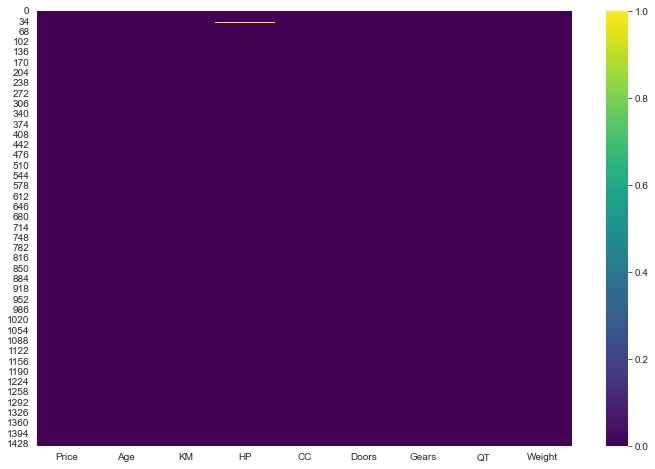

In [116]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis')

#### ^Observation: Feature 'HP' has missing Values in the data set
+ We will have to handle the missing values by observing the distribution and making the optimal choice

In [128]:
data.HP.unique()

array([ 90.,  nan, 192.,  69., 110.,  97.,  71., 116.,  98.,  86.,  72.,
       107.,  73.])

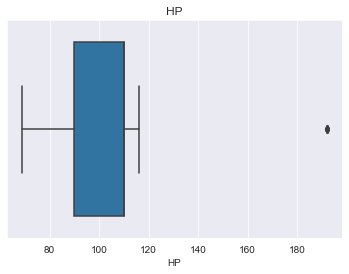

In [101]:
sns.boxplot(data['HP'])
plt.title('HP')
plt.show()

In [6]:
# As HP feature has an outlier it is best to replace the Missing vaalues with Median
HP_median = data.HP.median()
HP_median

110.0

In [7]:
data['HP']=data.HP.fillna(HP_median)
data.HP.isnull().sum()

0

In [7]:
data.HP.unique()

array([ 90., 110., 192.,  69.,  97.,  71., 116.,  98.,  86.,  72., 107.,
        73.])

<AxesSubplot:>

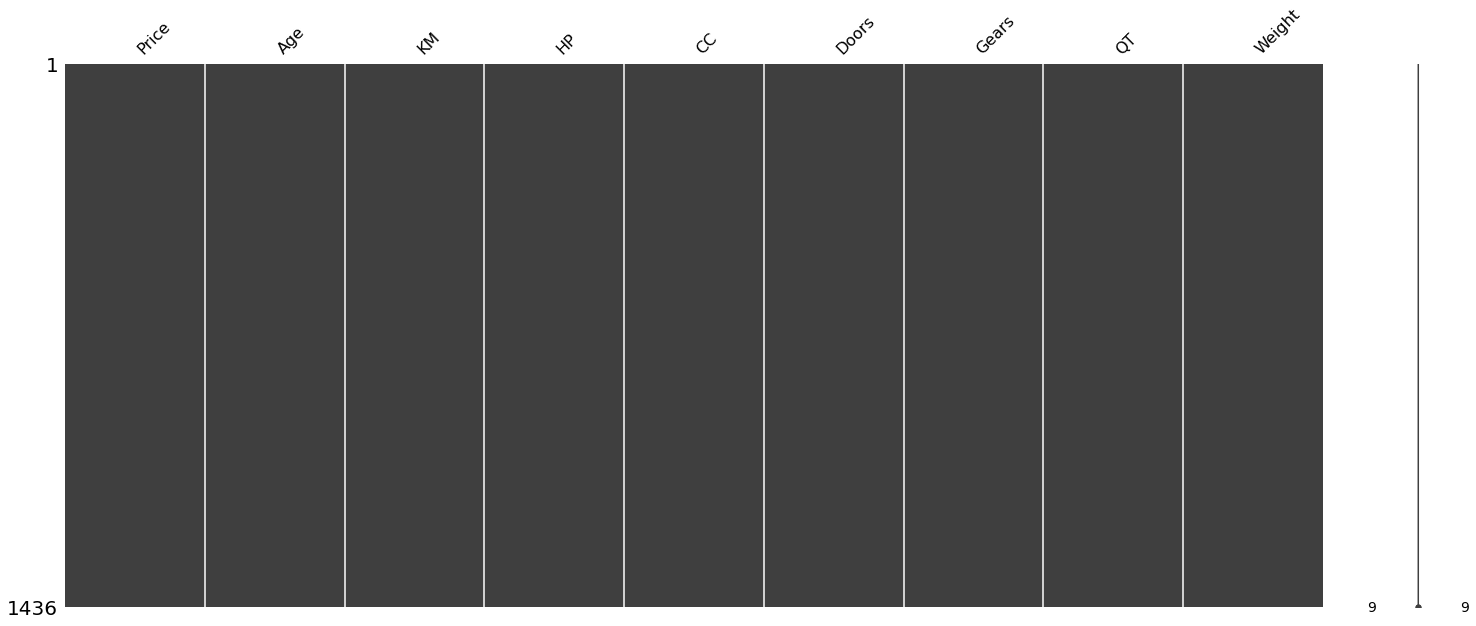

In [9]:
mn.matrix(data)

#### ^Observation: After checking above there is no null value present in the dataset 

### Checking for Duplicated Values

In [9]:
data[data.duplicated()].shape

(1, 9)

In [132]:
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116.0,2000,5,5,234,1320


In [8]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


#### ^Observation: There are duplicated values in the dataset
+ Hence, we dropped those values

### Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [9]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [10]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


## Exploratory Data Anlaysis

### Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [57]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

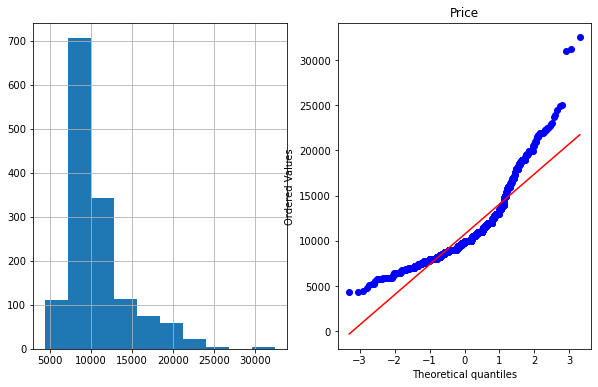

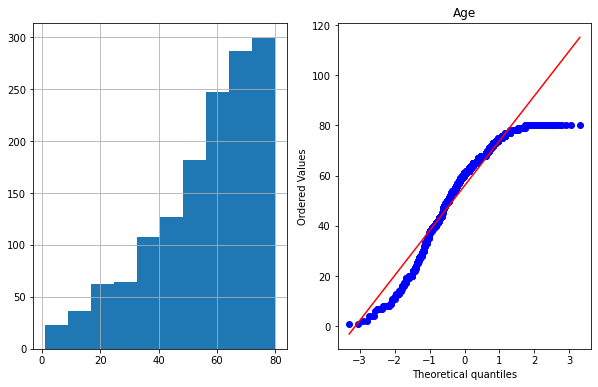

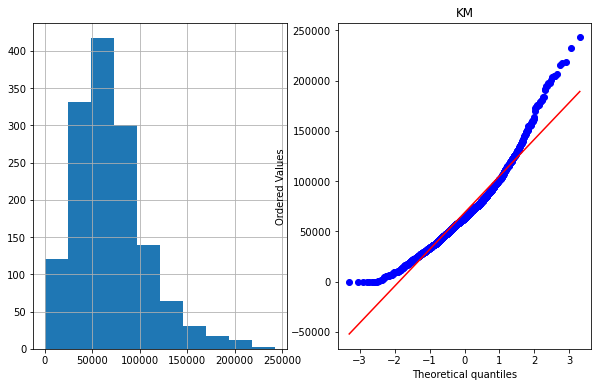

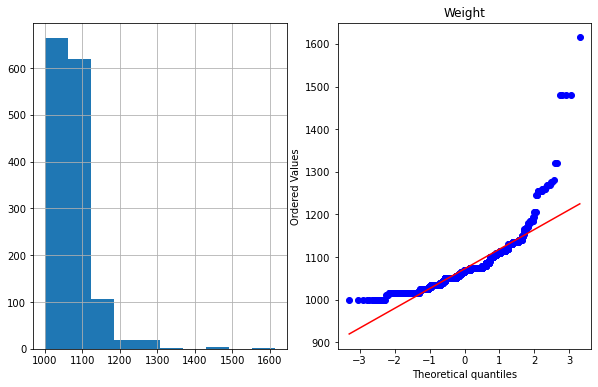

In [58]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

### Log transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

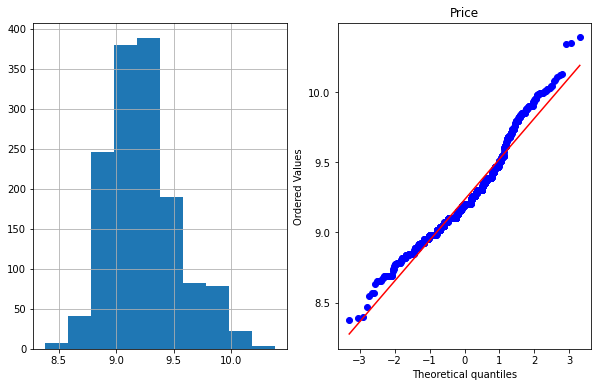

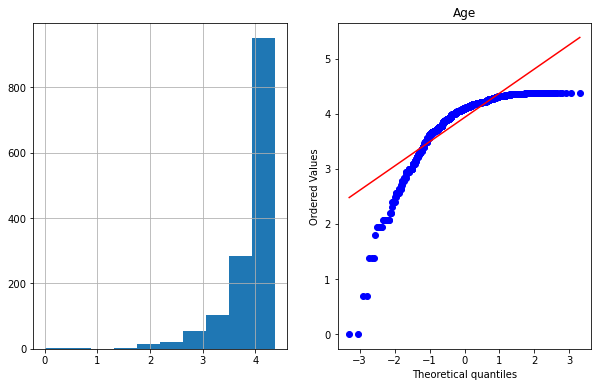

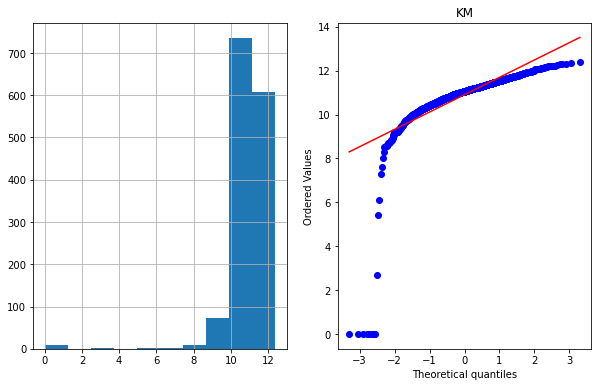

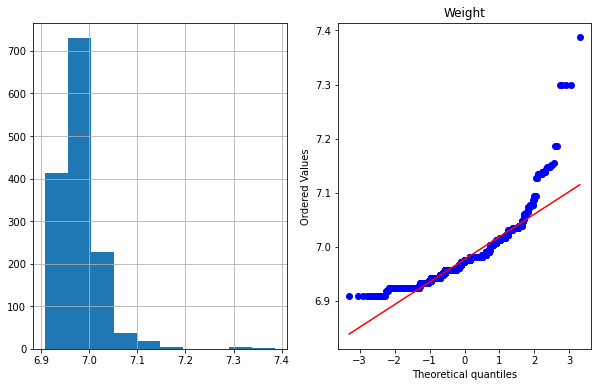

In [60]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### Square root transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

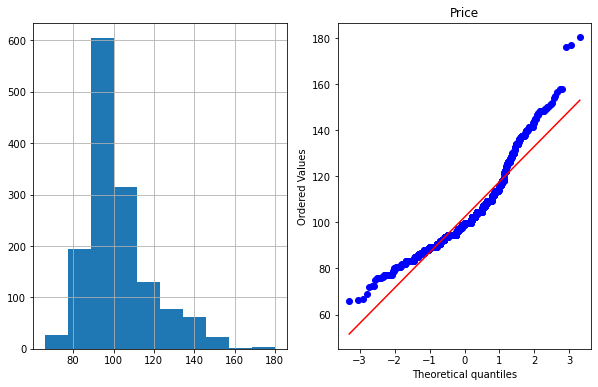

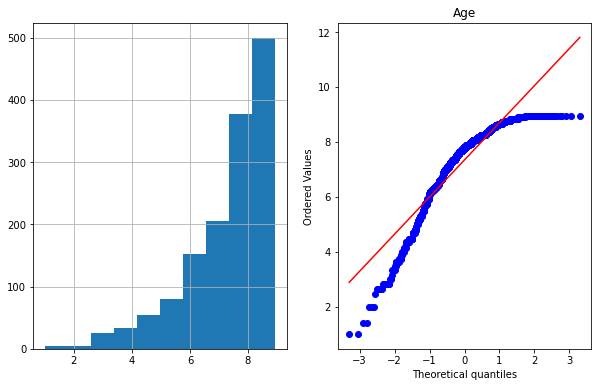

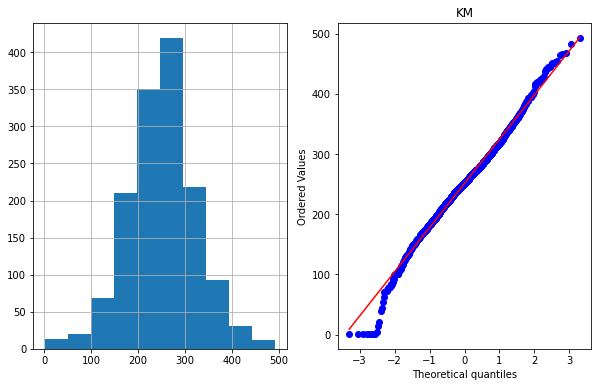

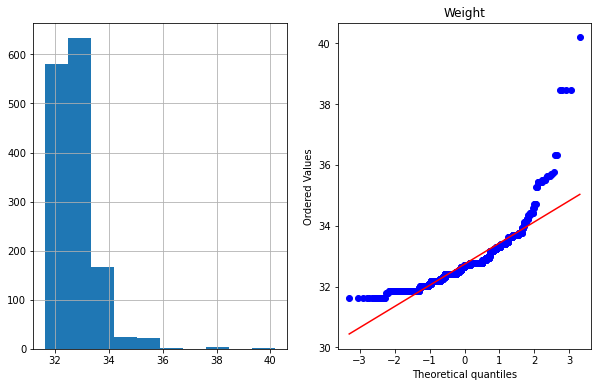

In [61]:
df=data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

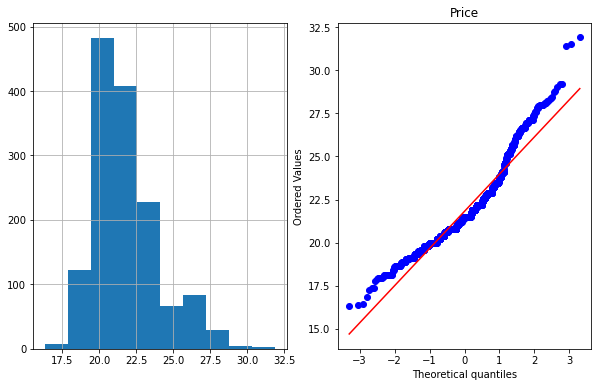

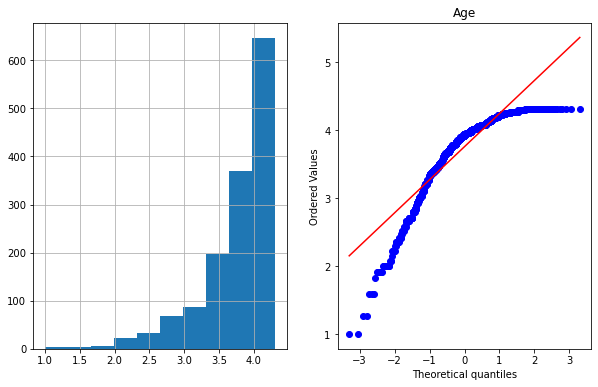

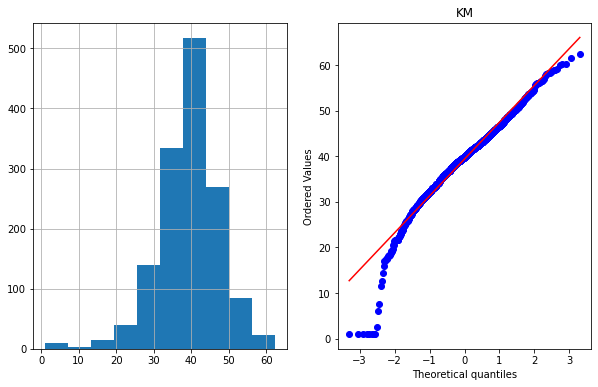

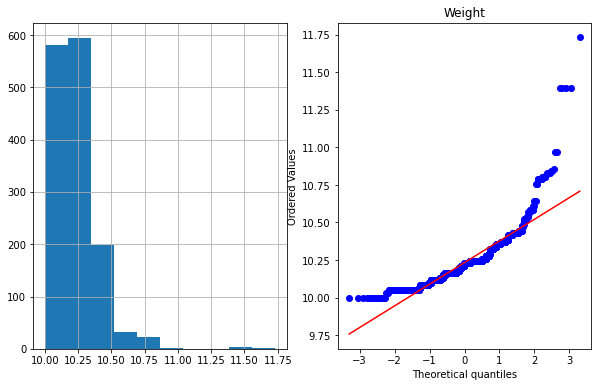

In [62]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

+ <b>Note:</b> Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.

### The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

+ To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

In [145]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [149]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age feature',shapiro(data.Age),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))

Price feature ShapiroResult(statistic=0.8534726500511169, pvalue=1.5959173670279415e-34) 
Age feature ShapiroResult(statistic=0.9266955256462097, pvalue=6.739428532958423e-26) 
Weight feature ShapiroResult(statistic=0.7825545072555542, pvalue=5.042992913412152e-40) 
KM feature ShapiroResult(statistic=0.947583794593811, pvalue=3.4451158696360995e-22)


#### ^Observation: Since the p-values are less than .05, we reject the null hypothesis.
+ We have sufficient evidence to say that the sample data does not come from a normal distribution.

### Visualizing the Relation between each independent Feature with respect to the Dependent Feature

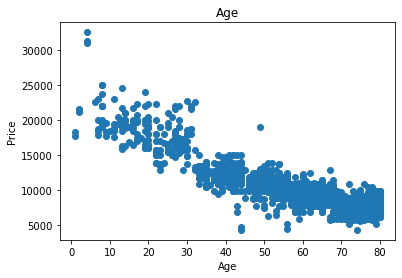

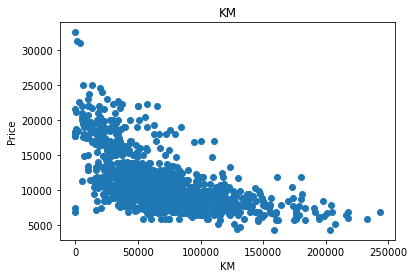

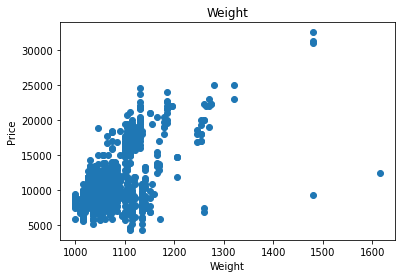

In [72]:
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

#### ^Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features

### Lets analyze the relationship between the discrete variables and Price

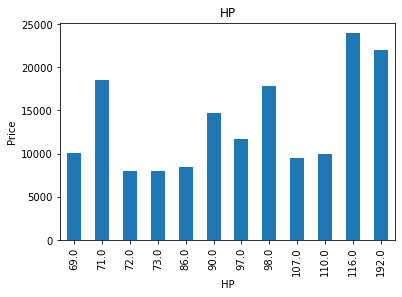

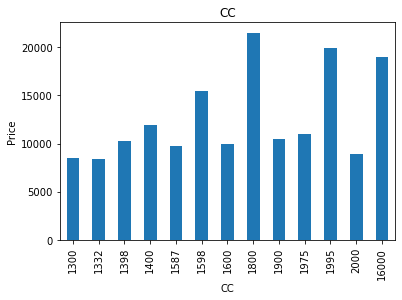

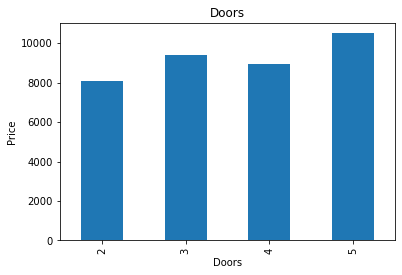

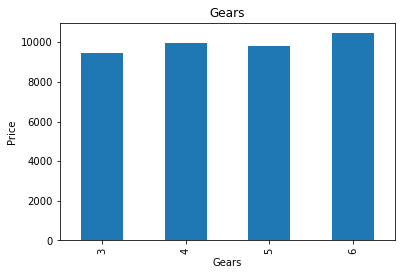

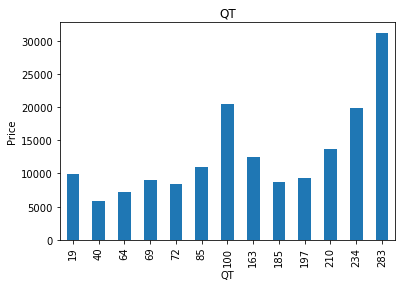

In [139]:
for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

#### ^Observation:There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation

### Checking the correlation between Variables

In [74]:
data.corr()

,Price,Age,KM,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,0.103822,-0.035193,0.014890,0.283312,-0.023969
CC,0.124375,-0.096549,0.103822,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

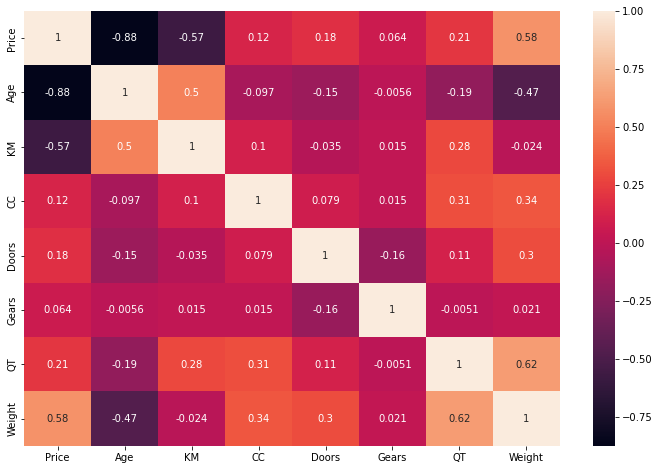

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(
    data.corr(),
    annot=True)

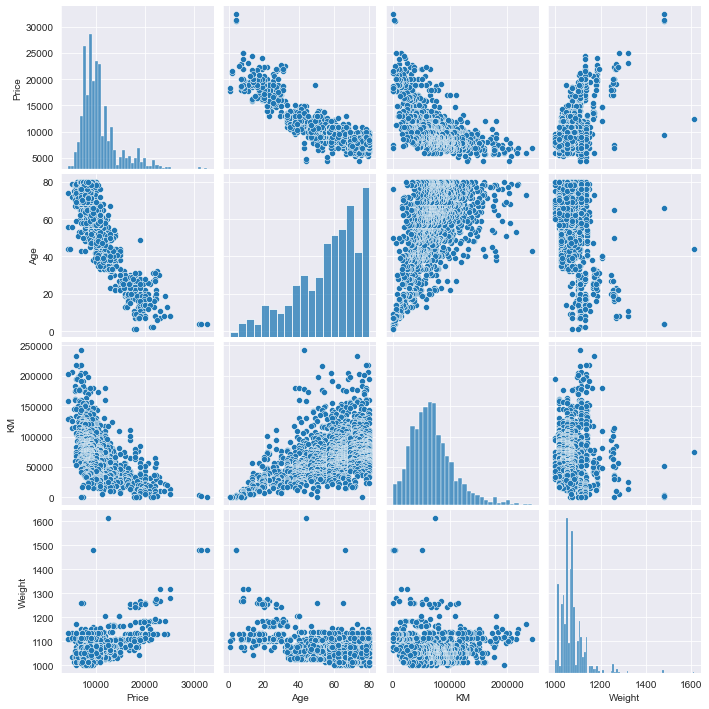

In [40]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature])

^Observation: Age and KM has the highest score of correlation with Price but a negative correlation
+ <b>Note:</b> QT and Weight also have a collinearity among themselves which will affect our model.
+ <b>Note:</b> KM and Age also have a collinearity among themselves which will affect our model.

### Visualizing Continuous Datatype for Outlier Detection

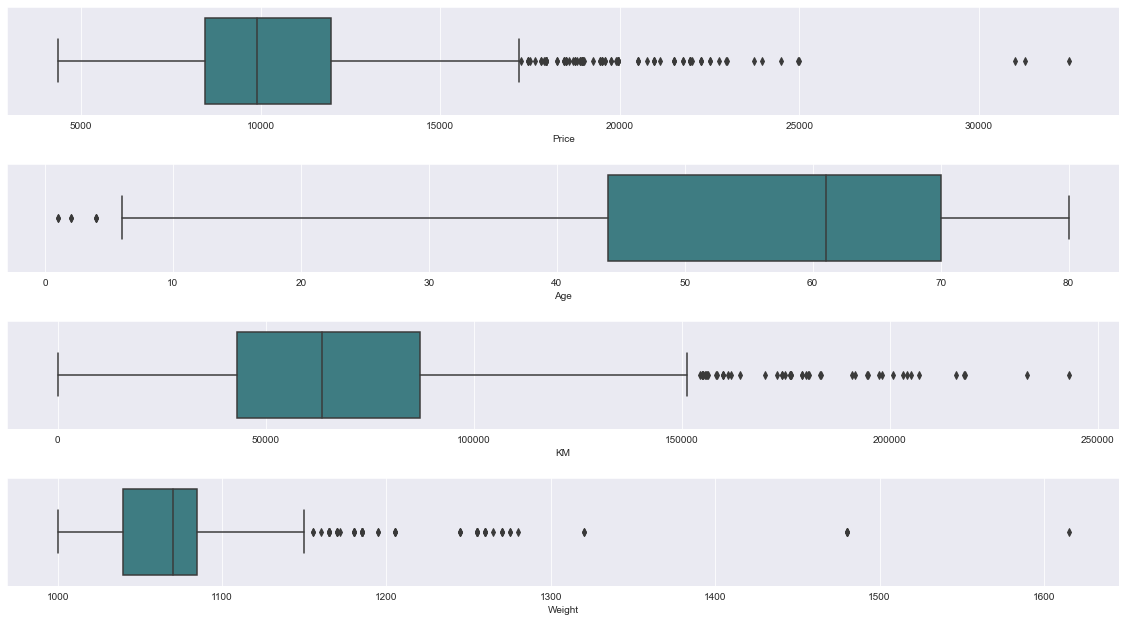

In [134]:
df=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

### ^Observation: A significant amount of outliers are present in each continuous feature
<b>Note:
+ We can't simply remove the outliers that would mean loss of information
+ We need to try different types of transformation or imputation and select the one with the best results
+ <b>Note:</b> Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values

### Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case

### Let's try Median Imputation to handle Outlier in Profit

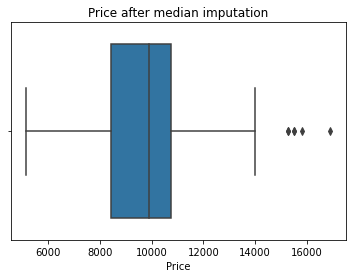

In [11]:
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

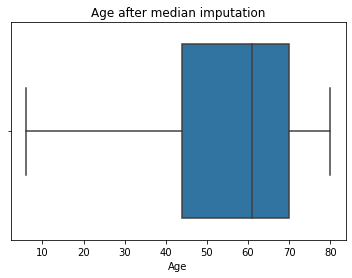

In [12]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

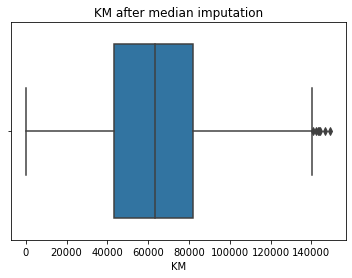

In [13]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

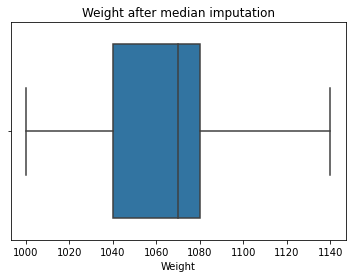

In [14]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

### Let's test our data in model and find the R-squared with median imputation data model

In [15]:
after_median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.34204996085646144, 0.3406706106695777)

### Let's try Mean Imputation to handle Outlier in Profit

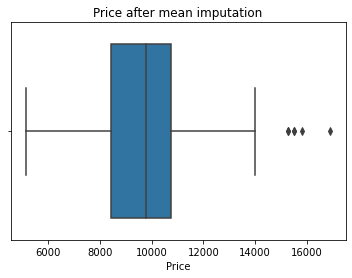

In [16]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

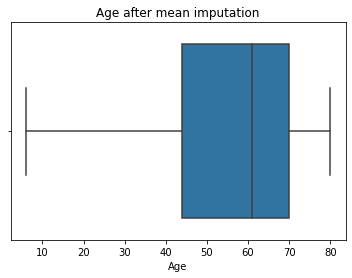

In [17]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

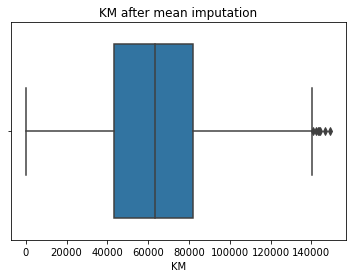

In [18]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

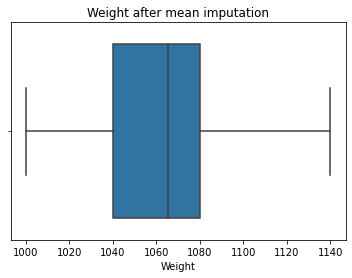

In [19]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

### Let's test our data in model and find the R-squared with mean imputation data model

In [20]:
after_mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

(0.3879621958171299, 0.3866790976951533)

#### ^Observation: As you can see after mean imputation the model is not performing well
+ Now we have to try something else to get out better results than the raw data

#### ^Observation: As you can see even after imputation  the model is not performing well it getting worse 
+ Now we have to try something else to get out model better than the raw data

### The best thing we can do is now to remove the outlier and see the results

In [21]:
df3=data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

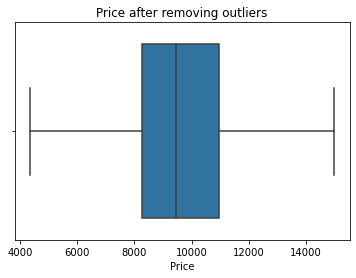

In [23]:
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

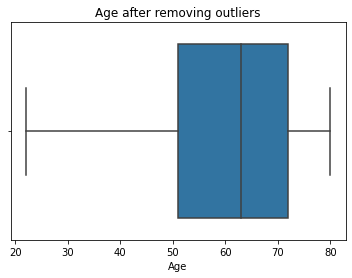

In [24]:
drop_outliers(df3, 'Age')
sns.boxplot(df3.Age)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

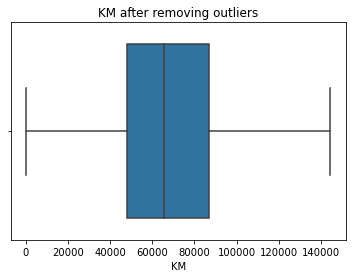

In [27]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

Text(0.5, 1.0, 'Weight after removing outliers')

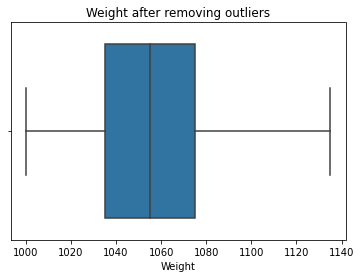

In [28]:
drop_outliers(df3, 'Weight')
sns.boxplot(df3.Weight)
plt.title('Weight after removing outliers')

#### Let's test our data in model and compare the R-squared with without imputation data model

In [29]:
removed_outlier_model = smf.ols("Price~Age+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.7047621976753136, 0.7040051776693528)

#### Let's try log transformation and visualize the result first

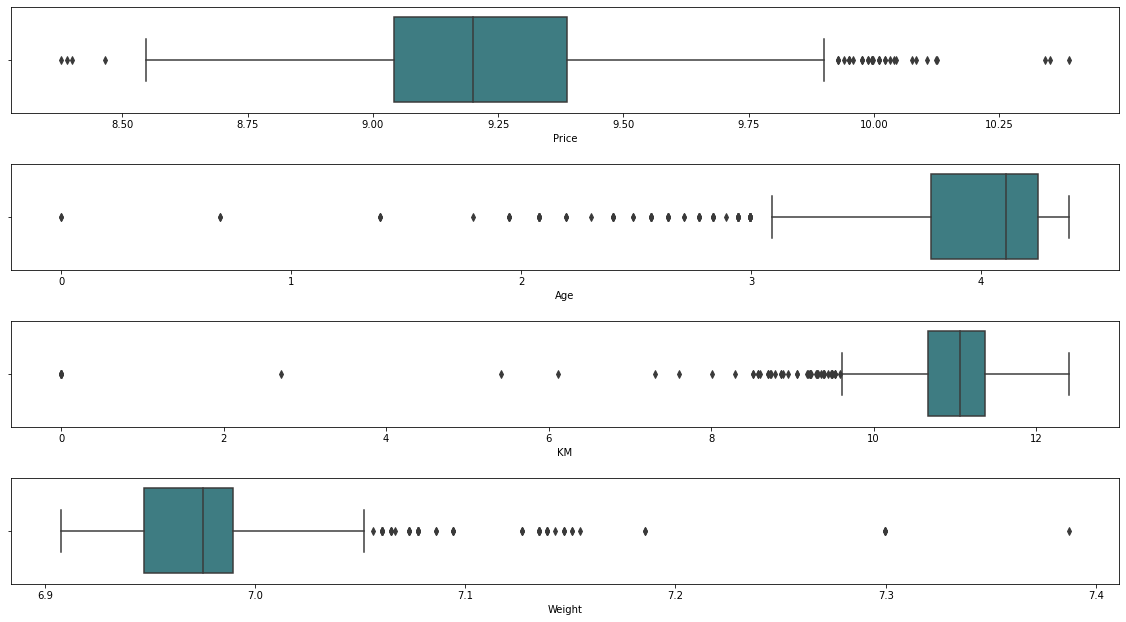

In [31]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])
    
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [30]:
log_transfomed = data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj

(0.7069873404282615, 0.7063730581230796)

#### ^Observation: The outliers are still present

#### Let's try cuberoot transformation and visualize the result first

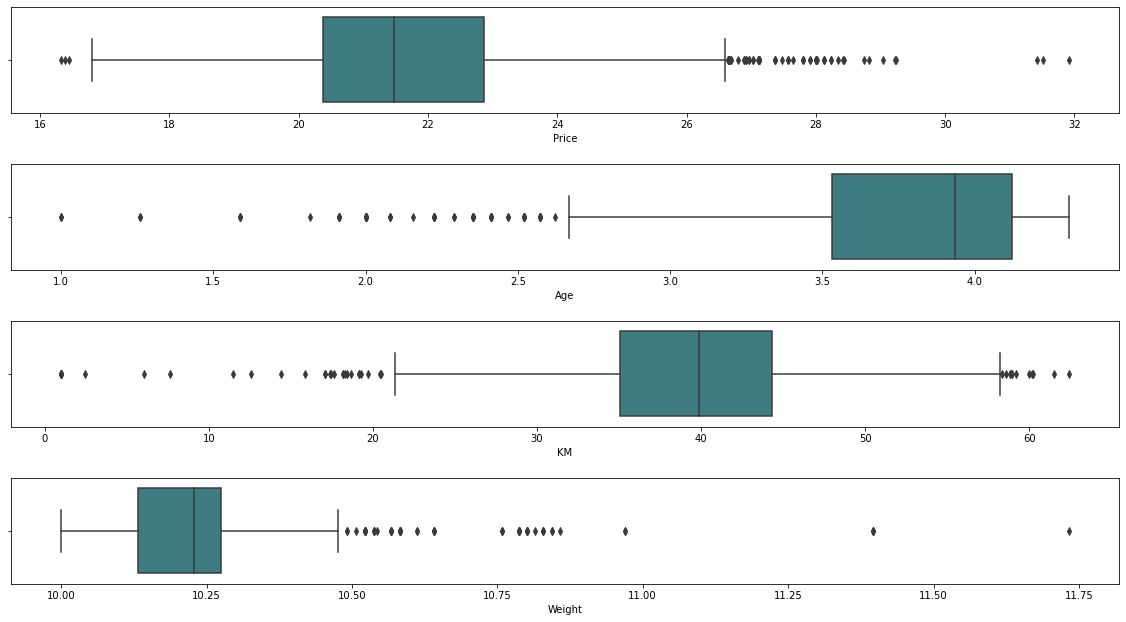

In [14]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [31]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price~Age+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj 

(0.8146046800585908, 0.8142160106247514)

#### ^Observation: The outliers are still present

### Raw Data Model

In [32]:
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+QT", data = data).fit()
# Finding rsquared values
raw_data_model.rsquared , raw_data_model.rsquared_adj 

(0.8617418646306396, 0.8611609480954743)

In [33]:
conitnuous_feature_model = smf.ols("Price~Age+KM+Weight", data = data).fit()
# Finding rsquared values
conitnuous_feature_model.rsquared , conitnuous_feature_model.rsquared_adj 

(0.8467399730874641, 0.8464186732406873)

#### ^Observation: After removing Outliers the model performed very poorly than the raw data model
+ Note: We will continue with different technique to deal with that

### Detecting Influencers/Outliers in the Model
+ Two Techniques : 1. Cook's Distance & 2. Leverage value

In [34]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

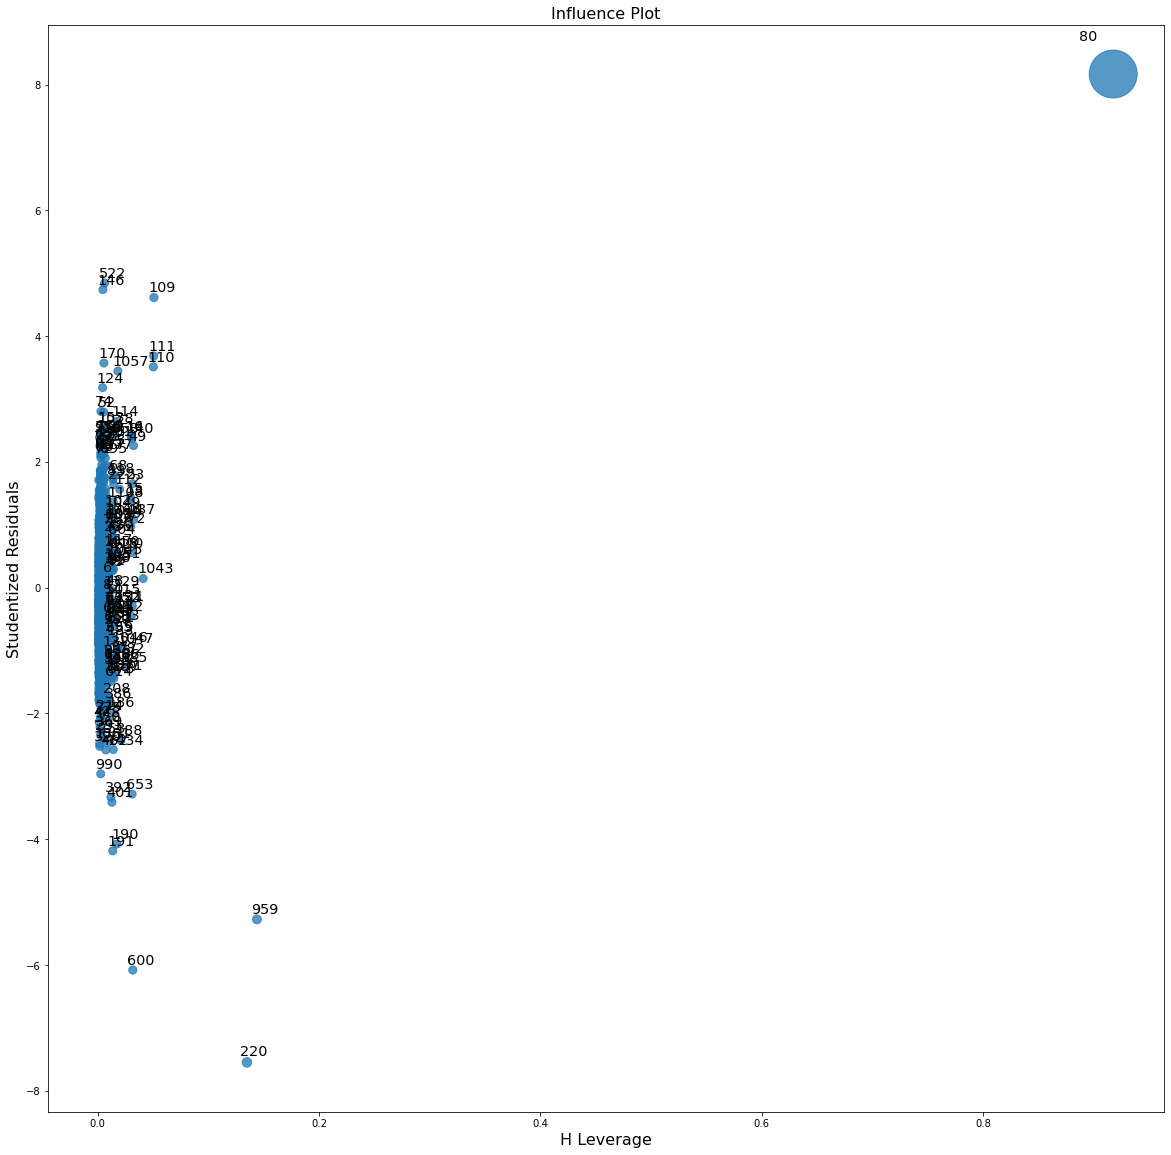

In [35]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [165]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


#### Let's plot the influencers and also plot a cut off line using the stem plot

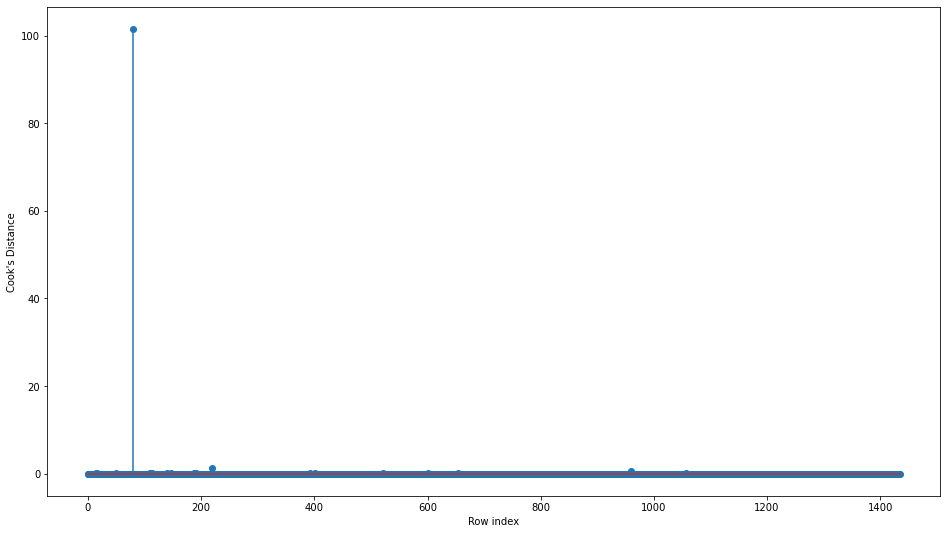

In [166]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [167]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 101.55177099787544)

In [168]:
data[data.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110.0,16000,5,5,100,1180


#### Let's improve the model by deleting the influence point and creating a new dataframe 

In [36]:
dataframe= data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170


### Model Deletion Diagnostics and Final Model

In [37]:
k=dataframe.shape[1]
n=dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8961291040050007


In [38]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1516.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:08:42   Log-Likelihood:                -11942.
No. Observations:                1415   AIC:                         2.390e+04
Df Residuals:                    1406   BIC:                         2.395e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.549e+04   1406.428    -11.017      0.000   -1.83e+04   -1.27e+04
Age         -110.2879      2.317    -47.591      0.000    -114.834    -105.742
KM            -0.0173      0.001    -15.477      0.000      -0.020      -0.015
HP            27.2559      2.744      9.932      0.000      21.873      32.639
CC            -3.3044      0.286    -11.564      0.000      -3.865      -2.744
Doors       -136.0069     34.918     -3.895      0.000    -204.504     -67.510
Gears        314.0351    175.589      1.788      0.074     -30.410     658.481
QT             1.0384      1.356      0.766      0.444      -1.622       3.698
Weight        32.5472      1.278     25.470      0.000      30.041      35.054
==============================================================================
Omnibus:                       21.013   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.413
Skew:                           0.215   Prob(JB):                     3.03e-06
Kurtosis:                       3.497   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [ ]:
dataframe.reset_index(inplace=True)

In [177]:
dataframe.shape

(1415, 9)

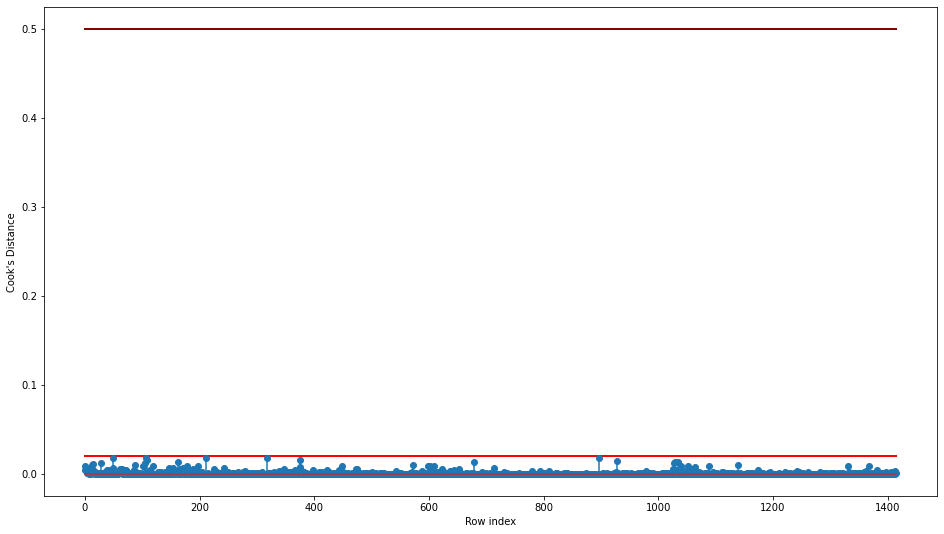

In [178]:
fig = plt.figure(figsize = (16,9))
x = [0,1415]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

#### ^Observation: All the points are below our cut-off line 
+ Hence, we can say that there are no influncers present in our model we can proceed with the predictions

## Feature Engineering

#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

#### Reciprocal_Transformation

In [39]:
df_reciprocal_scaled = pd.DataFrame()
df_reciprocal_scaled['Age'] = 1/(dataframe.Age)
df_reciprocal_scaled['Price'] = 1/(dataframe.Price)
df_reciprocal_scaled['KM'] = 1/(dataframe.KM)
df_reciprocal_scaled['Weight'] = 1/(dataframe.Weight)
df_reciprocal_scaled['CC'] = dataframe['CC']
df_reciprocal_scaled['QT'] = dataframe['QT']
df_reciprocal_scaled['Doors'] = dataframe['Doors']
df_reciprocal_scaled['Gears'] = dataframe['Gears']
df_reciprocal_scaled['HP'] = dataframe['HP']
df_reciprocal_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,0.043478,0.000074,0.000021,0.000858,2000,210,3,5,90.0
1,0.043478,0.000073,0.000014,0.000858,2000,210,3,5,90.0
2,0.041667,0.000072,0.000024,0.000858,2000,210,3,5,90.0
3,0.038462,0.000067,0.000021,0.000858,2000,210,3,5,90.0
4,0.033333,0.000073,0.000026,0.000855,2000,210,3,5,90.0


In [40]:
reciprocal_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_reciprocal_scaled).fit()
# Finding rsquared values for Reciprocal transformation
reciprocal_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     124.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.59e-158
Time:                        23:09:05   Log-Likelihood:                 13265.
No. Observations:                1415   AIC:                        -2.651e+04
Df Residuals:                    1406   BIC:                        -2.646e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004   3.65e-05    -11.535      0.000      -0.000      -0.000
Age           -0.0001   1.64e-05     -6.907      0.000      -0.000    -8.1e-05
KM           1.42e-05   1.18e-05      1.202      0.229   -8.97e-06    3.74e-05
HP          -4.76e-07   4.83e-08     -9.858      0.000   -5.71e-07   -3.81e-07
CC          6.662e-08   4.98e-09     13.388      0.000    5.69e-08    7.64e-08
Doors         1.3e-06   6.49e-07      2.004      0.045    2.76e-08    2.57e-06
Gears      -5.115e-07   3.21e-06     -0.159      0.873   -6.81e-06    5.78e-06
QT         -3.519e-08   2.47e-08     -1.426      0.154   -8.36e-08    1.32e-08
Weight         0.5024      0.027     18.623      0.000       0.449       0.555
==============================================================================
Omnibus:                      166.361   Durbin-Watson:                   0.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.039
Skew:                           0.799   Prob(JB):                     5.13e-60
Kurtosis:                       4.442   Cond. No.                     7.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Log-Transformation

In [94]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['QT'] = dataframe['QT']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['Gears'] = dataframe['Gears']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,3.135494,9.510445,10.757605,7.060476,2000,210,3,5,90.0
1,3.135494,9.528794,11.197351,7.060476,2000,210,3,5,90.0
2,3.178054,9.543235,10.638520,7.060476,2000,210,3,5,90.0
3,3.258097,9.612467,10.778956,7.060476,2000,210,3,5,90.0
4,3.401197,9.528794,10.558414,7.064759,2000,210,3,5,90.0


In [95]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     580.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:32:21   Log-Likelihood:                 790.51
No. Observations:                1415   AIC:                            -1563.
Df Residuals:                    1406   BIC:                            -1516.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1722      1.327     -0.130      0.897      -2.774       2.430
Age           -0.4146      0.013    -31.211      0.000      -0.441      -0.389
KM             0.0101      0.006      1.720      0.086      -0.001       0.022
HP             0.0041      0.000     12.482      0.000       0.003       0.005
CC            -0.0003    3.5e-05     -8.223      0.000      -0.000      -0.000
Doors          0.0030      0.004      0.686      0.493      -0.006       0.012
Gears          0.0414      0.022      1.913      0.056      -0.001       0.084
QT             0.0006      0.000      3.470      0.001       0.000       0.001
Weight         1.5330      0.194      7.899      0.000       1.152       1.914
==============================================================================
Omnibus:                      327.684   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.992
Skew:                          -1.060   Prob(JB):                    5.20e-288
Kurtosis:                       7.237   Cond. No.                     5.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Quantile Transformer Scaler
One of the most interesting feature transformation techniques that I have used, the Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler.

In [126]:
from sklearn.preprocessing import QuantileTransformer

col_names = dataframe.columns
features = dataframe[col_names]

scaler = QuantileTransformer().fit(features.values)
features = scaler.transform(features.values)
df_quantile_scaled = pd.DataFrame(features, columns = col_names)
df_quantile_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.851852,0.078078,0.292065,0.26026,1.0,0.218719,0.486486,0.979479,0.965966
1,0.859359,0.078078,0.606641,0.26026,1.0,0.218719,0.486486,0.979479,0.965966
2,0.867367,0.082082,0.238397,0.26026,1.0,0.218719,0.486486,0.979479,0.965966
3,0.882883,0.091091,0.306219,0.26026,1.0,0.218719,0.486486,0.979479,0.965966
4,0.859359,0.116617,0.206305,0.26026,1.0,0.218719,0.486486,0.979479,0.970470


In [127]:
quantile_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_quantile_scaled).fit()
# Finding rsquared values for Quantile transformation
quantile_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     695.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:53:07   Log-Likelihood:                 882.32
No. Observations:                1415   AIC:                            -1747.
Df Residuals:                    1406   BIC:                            -1699.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7277      0.024     30.419      0.000       0.681       0.775
Age           -0.6546      0.016    -42.096      0.000      -0.685      -0.624
KM            -0.2182      0.016    -13.837      0.000      -0.249      -0.187
HP             0.1391      0.017      8.323      0.000       0.106       0.172
CC            -0.0975      0.021     -4.570      0.000      -0.139      -0.056
Doors          0.0145      0.012      1.246      0.213      -0.008       0.037
Gears          0.1350      0.041      3.276      0.001       0.054       0.216
QT             0.0673      0.020      3.366      0.001       0.028       0.107
Weight         0.1545      0.025      6.250      0.000       0.106       0.203
==============================================================================
Omnibus:                        8.621   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.019
Skew:                          -0.108   Prob(JB):                      0.00667
Kurtosis:                       3.351   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Power Transformer Scaler
I often use this feature transformation technique when I am building a linear model. To be more specific, I use it when I am dealing with heteroskedasticity. Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:

1. Box-Cox transform

In [98]:
import scipy .stats as stat
df_boxcox_scaled=pd.DataFrame()
df_boxcox_scaled['Price'], param = stat.boxcox(dataframe['Price'])
df_boxcox_scaled['Age'], param1= stat.boxcox(dataframe['Age'])
df_boxcox_scaled['KM'], param2= stat.boxcox(dataframe['KM'])
df_boxcox_scaled['Weight'] =dataframe['Weight']
df_boxcox_scaled['CC'] = dataframe['CC']
df_boxcox_scaled['QT'] = dataframe['QT']
df_boxcox_scaled['Doors'] = dataframe['Doors']
df_boxcox_scaled['Gears'] = dataframe['Gears']
df_boxcox_scaled['HP'] = dataframe['HP']
print('Optimal lambda', param,param1,param2)
df_boxcox_scaled.head()

Optimal lambda -0.8836060017607738 1.685564519085684 0.5324904145809797


,Price,Age,KM,Weight,CC,QT,Doors,Gears,HP
0,1.131473,116.500755,575.508545,1165,2000,210,3,5,90.0
1,1.131477,116.500755,727.850597,1165,2000,210,3,5,90.0
2,1.131480,125.209356,540.032280,1165,2000,210,3,5,90.0
3,1.131494,143.380534,582.110529,1165,2000,210,3,5,90.0
4,1.131477,182.654116,517.402623,1170,2000,210,3,5,90.0


In [99]:
import scipy.special
reverse_function=pd.DataFrame()
reverse_function['Price'] = scipy.special.inv_boxcox(df_boxcox_scaled['Price'], param)
reverse_function['Age']= scipy.special.inv_boxcox(df_boxcox_scaled['Age'], param1)
reverse_function['KM']= scipy.special.inv_boxcox(df_boxcox_scaled['KM'], param2)
reverse_function['Weight'] =dataframe['Weight']
reverse_function['CC'] = dataframe['CC']
reverse_function['QT'] = dataframe['QT']
reverse_function['Doors'] = dataframe['Doors']
reverse_function['Gears'] = dataframe['Gears']
reverse_function['HP'] = dataframe['HP']
display(reverse_function.head(),dataframe.head())

,Price,Age,KM,Weight,CC,QT,Doors,Gears,HP
0,13500.0,23.0,46986.0,1165,2000,210,3,5,90.0
1,13750.0,23.0,72937.0,1165,2000,210,3,5,90.0
2,13950.0,24.0,41711.0,1165,2000,210,3,5,90.0
3,14950.0,26.0,48000.0,1165,2000,210,3,5,90.0
4,13750.0,30.0,38500.0,1170,2000,210,3,5,90.0


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170


In [100]:
boxcox_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_boxcox_scaled).fit()
# Finding rsquared values for Box-Cox transformation
boxcox_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     747.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:32:35   Log-Likelihood:                 12540.
No. Observations:                1415   AIC:                        -2.506e+04
Df Residuals:                    1406   BIC:                        -2.501e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1311   4.16e-05   2.72e+04      0.000       1.131       1.131
Age        -1.806e-07   4.82e-09    -37.498      0.000    -1.9e-07   -1.71e-07
KM          -1.02e-07   6.24e-09    -16.351      0.000   -1.14e-07   -8.98e-08
HP          6.544e-07   8.28e-08      7.899      0.000    4.92e-07    8.17e-07
CC         -2.554e-08   8.67e-09     -2.945      0.003   -4.26e-08   -8.53e-09
Doors       3.761e-06   1.07e-06      3.522      0.000    1.67e-06    5.86e-06
Gears       1.778e-05   5.38e-06      3.306      0.001    7.23e-06    2.83e-05
QT          1.199e-07   4.17e-08      2.876      0.004    3.81e-08    2.02e-07
Weight      2.593e-07   3.78e-08      6.863      0.000    1.85e-07    3.33e-07
==============================================================================
Omnibus:                      237.259   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.258
Skew:                          -0.885   Prob(JB):                    5.09e-138
Kurtosis:                       5.755   Cond. No.                     9.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Cube-Root Transformation

In [101]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']
df_cbrt_scaled['QT'] = dataframe['QT']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,2.843867,23.811016,36.084677,10.522251,2000,210,3,5,90.0
1,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90.0
2,2.884499,24.072696,34.680355,10.522251,2000,210,3,5,90.0
3,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90.0
4,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90.0


In [102]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1079.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:32:39   Log-Likelihood:                -1710.9
No. Observations:                1415   AIC:                             3440.
Df Residuals:                    1406   BIC:                             3487.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5893      3.185     -1.441      0.150     -10.837       1.658
Age           -2.6094      0.069    -37.811      0.000      -2.745      -2.474
KM            -0.0480      0.004    -11.723      0.000      -0.056      -0.040
HP             0.0227      0.002     11.662      0.000       0.019       0.027
CC            -0.0015      0.000     -7.087      0.000      -0.002      -0.001
Doors          0.0120      0.026      0.470      0.638      -0.038       0.062
Gears          0.3730      0.127      2.935      0.003       0.124       0.622
QT             0.0043      0.001      4.368      0.000       0.002       0.006
Weight         3.5013      0.321     10.914      0.000       2.872       4.131
==============================================================================
Omnibus:                      117.462   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.034
Skew:                          -0.511   Prob(JB):                     1.53e-56
Kurtosis:                       4.821   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Square-Root Transformation

In [103]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']
df_sqrt_scaled['QT'] = dataframe['QT']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,4.795832,116.189500,216.762543,34.132096,2000,210,3,5,90.0
1,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90.0
2,4.898979,118.110118,204.232710,34.132096,2000,210,3,5,90.0
3,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90.0
4,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90.0


In [104]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1337.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:32:42   Log-Likelihood:                -4367.0
No. Observations:                1415   AIC:                             8752.
Df Residuals:                    1406   BIC:                             8799.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -44.9620     13.396     -3.356      0.001     -71.241     -18.683
Age           -6.8094      0.158    -43.225      0.000      -7.118      -6.500
KM            -0.0419      0.003    -14.572      0.000      -0.048      -0.036
HP             0.1449      0.013     11.314      0.000       0.120       0.170
CC            -0.0104      0.001     -7.604      0.000      -0.013      -0.008
Doors         -0.0384      0.167     -0.231      0.818      -0.365       0.288
Gears          2.5242      0.831      3.038      0.002       0.894       4.154
QT             0.0245      0.006      3.818      0.000       0.012       0.037
Weight         5.9492      0.427     13.926      0.000       5.111       6.787
==============================================================================
Omnibus:                       15.835   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.862
Skew:                          -0.158   Prob(JB):                     4.86e-05
Kurtosis:                       3.487   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Applying Standard Scaler
+ For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
+ x_scaled = x – mean/std_dev
+ However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [128]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.812024,-1.792982,-0.581019,-0.802321,2.351384,-1.081458,-0.150625,3.032691,2.013025
1,0.883978,-1.792982,0.118411,-0.802321,2.351384,-1.081458,-0.150625,3.032691,2.013025
2,0.941541,-1.738892,-0.723191,-0.802321,2.351384,-1.081458,-0.150625,3.032691,2.013025
3,1.229357,-1.630713,-0.553690,-0.802321,2.351384,-1.081458,-0.150625,3.032691,2.013025
4,0.883978,-1.414355,-0.809733,-0.802321,2.351384,-1.081458,-0.150625,3.032691,2.119377


In [129]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1516.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:55:11   Log-Likelihood:                -405.59
No. Observations:                1415   AIC:                             829.2
Df Residuals:                    1406   BIC:                             876.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.674e-18      0.009   1.01e-15      1.000      -0.017       0.017
Age           -0.5869      0.012    -47.591      0.000      -0.611      -0.563
KM            -0.1849      0.012    -15.477      0.000      -0.208      -0.161
HP             0.1109      0.011      9.932      0.000       0.089       0.133
CC            -0.1764      0.015    -11.564      0.000      -0.206      -0.146
Doors         -0.0373      0.010     -3.895      0.000      -0.056      -0.019
Gears          0.0161      0.009      1.788      0.074      -0.002       0.034
QT             0.0121      0.016      0.766      0.444      -0.019       0.043
Weight         0.4404      0.017     25.470      0.000       0.406       0.474
==============================================================================
Omnibus:                       21.013   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.413
Skew:                           0.215   Prob(JB):                     3.03e-06
Kurtosis:                       3.497   Cond. No.                         3.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's try Robust transformation

The Robust Scaler, as the name suggests is not sensitive to outliers.
+ This scaler removes the median from the data 
+ Scales the data by the InterQuartile Range(IQR)

The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

In [58]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.035226,-1.461538,-0.374898,90.0,2000,3,5,210,2.222222
1,1.107117,-1.461538,0.215703,90.0,2000,3,5,210,2.222222
2,1.164630,-1.423077,-0.494948,90.0,2000,3,5,210,2.222222
3,1.452193,-1.346154,-0.351821,90.0,2000,3,5,210,2.222222
4,1.107117,-1.192308,-0.568025,90.0,2000,3,5,210,2.333333


In [59]:
robust_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1516.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:09:21   Log-Likelihood:                -404.34
No. Observations:                1415   AIC:                             826.7
Df Residuals:                    1406   BIC:                             874.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4146      0.286      1.452      0.147      -0.146       0.975
Age           -0.8246      0.017    -47.591      0.000      -0.859      -0.791
KM            -0.2188      0.014    -15.477      0.000      -0.247      -0.191
HP             0.0078      0.001      9.932      0.000       0.006       0.009
CC            -0.0010   8.22e-05    -11.564      0.000      -0.001      -0.001
Doors         -0.0391      0.010     -3.895      0.000      -0.059      -0.019
Gears          0.0903      0.050      1.788      0.074      -0.009       0.189
QT             0.0003      0.000      0.766      0.444      -0.000       0.001
Weight         0.4212      0.017     25.470      0.000       0.389       0.454
==============================================================================
Omnibus:                       21.013   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.413
Skew:                           0.215   Prob(JB):                     3.03e-06
Kurtosis:                       3.497   Cond. No.                     5.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ^Observation: After the transformationand building models the R-Squared had varince with respect to other transforamtions
+ But standard scaler and robust scaler where better than raw data model with better AIC, BIC log-likelihood scores
+ We have to perform model validation test to check which model is better will do at the end of this

## For building Multi Linear Resgression there are assumption regarding the data set. 
## They are as follows:-
1. <b>Feature should be independent of each other there should'nt be any dependency upon each other
2. <b>There shouldn't any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)
3. <b>Each Feature and Model Error (residuals) should be independent of each other
4. <b>Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
5. <b>There should be a linear relation between the dependent variable and Independent variables

<b>Note:</b> If any of the above step is not followed our model can't be a good predictor

#### We will Check the above one by one

### Preparing a Model

In [60]:
x_train = dataframe
y_train = dataframe.drop('Price',axis=1)

In [61]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1516.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:09:26   Log-Likelihood:                -11942.
No. Observations:                1415   AIC:                         2.390e+04
Df Residuals:                    1406   BIC:                         2.395e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.549e+04   1406.428    -11.017      0.000   -1.83e+04   -1.27e+04
Age         -110.2879      2.317    -47.591      0.000    -114.834    -105.742
KM            -0.0173      0.001    -15.477      0.000      -0.020      -0.015
HP            27.2559      2.744      9.932      0.000      21.873      32.639
CC            -3.3044      0.286    -11.564      0.000      -3.865      -2.744
Doors       -136.0069     34.918     -3.895      0.000    -204.504     -67.510
Gears        314.0351    175.589      1.788      0.074     -30.410     658.481
QT             1.0384      1.356      0.766      0.444      -1.622       3.698
Weight        32.5472      1.278     25.470      0.000      30.041      35.054
==============================================================================
Omnibus:                       21.013   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.413
Skew:                           0.215   Prob(JB):                     3.03e-06
Kurtosis:                       3.497   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ <b>Summary
The values we are concerned with are -

The coefficients and significance (p-values) R-squared F statistic and its significance

1. R - squared is 0.896 Meaning that 89.9% of the variance in cnt with registered

This is a decent R-squared value.

3.F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

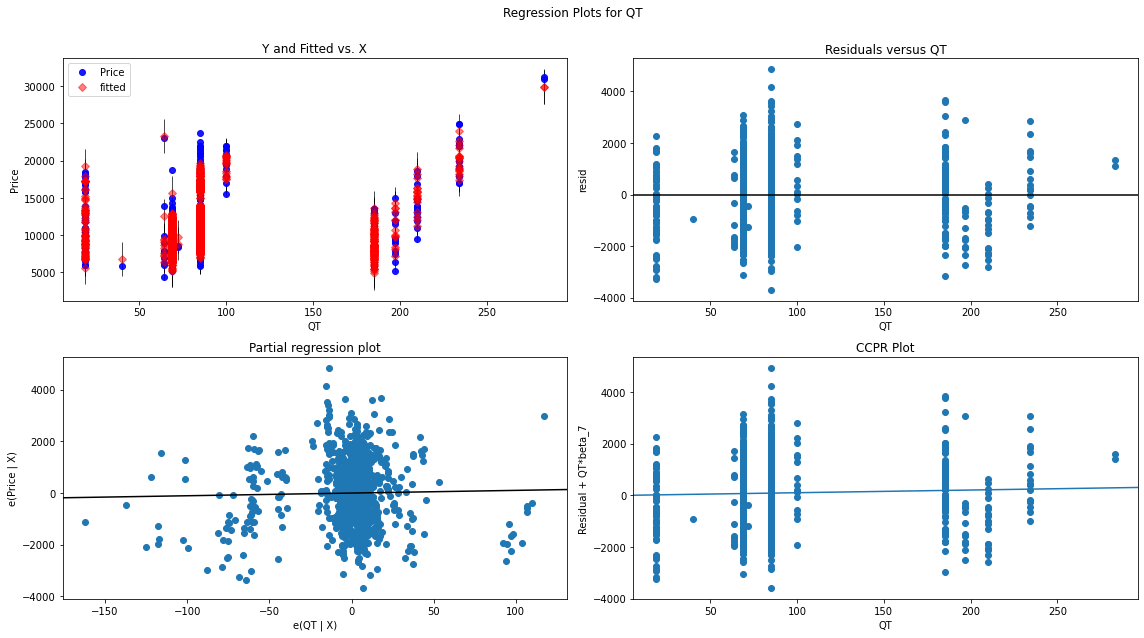

In [159]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

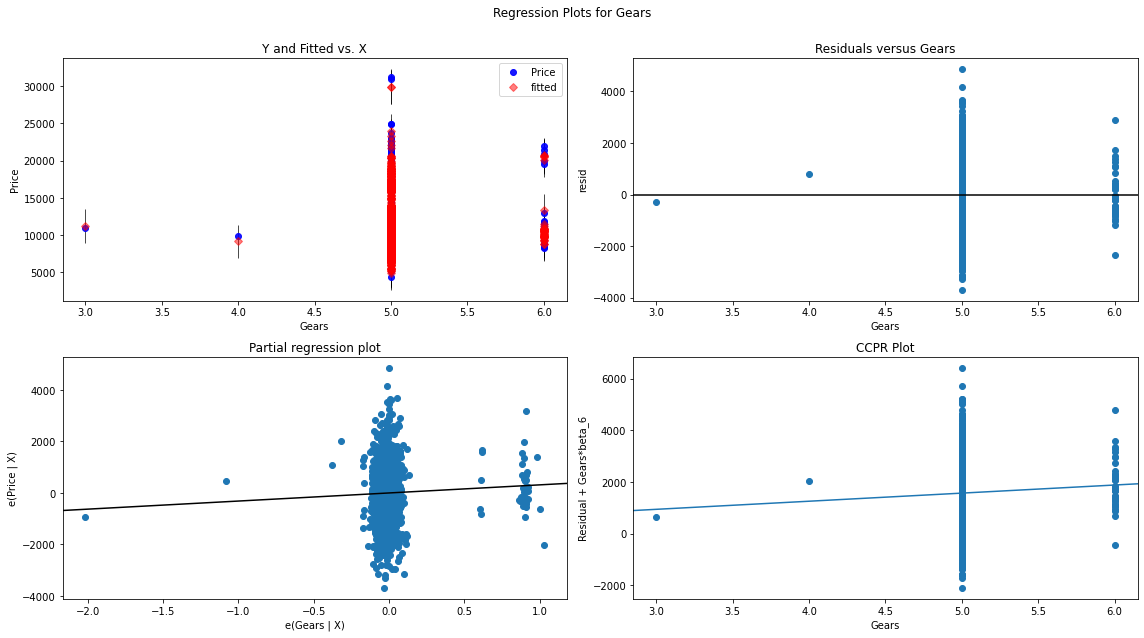

In [161]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

#### ^Observation No Linear Relation found in both with the Dependent feature

### Model Testing
#### As Y = Beta0 + Beta1*(X1) + Beta2*(X2) +Beta3*(X3) + .................. + Beta n*(Xn) 
#### Finding Coefficient Parameters (Beta0 and Beta1's values)

In [61]:
# Finding Coefficient parameters
model.params

Intercept   -15494.900637
Age           -110.287851
KM              -0.017314
HP              27.255915
CC              -3.304380
Doors         -136.006911
Gears          314.035060
QT               1.038427
Weight          32.547233
dtype: float64

Assupmtion for multi linear Regression fails

Feature should be independent of each other there should'nt be any dependency upon each other

In [62]:
# Finding tvalues and pvalues
display(model.tvalues, model.pvalues)

Intercept   -11.017202
Age         -47.591440
KM          -15.476854
HP            9.932247
CC          -11.564188
Doors        -3.895046
Gears         1.788462
QT            0.765821
Weight       25.470175
dtype: float64

Intercept     3.920932e-27
Age          2.675192e-295
KM            5.184275e-50
HP            1.628839e-22
CC            1.304226e-29
Doors         1.027902e-04
Gears         7.391678e-02
QT            4.439112e-01
Weight       5.554655e-118
dtype: float64

#### Here, (Intercept) Beta0 p_value ~ 1
#### Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
#### Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

#### ^Observation: Since the p-value is not less than .05 for Gears and QT features, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data providing those features dependency towards the dependent variable

+ Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

+ Maybe we could drop some?

+ We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

In [63]:
gears_model = smf.ols('Price~Gears', data=x_train).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.301
Date:                Tue, 05 Apr 2022   Prob (F-statistic):              0.129
Time:                        15:28:38   Log-Likelihood:                -13543.
No. Observations:                1415   AIC:                         2.709e+04
Df Residuals:                    1413   BIC:                         2.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6728.5173   2605.556      2.582      0.010    1617.343    1.18e+04
Gears        785.8108    518.002      1.517      0.129    -230.324    1801.946
==============================================================================
Omnibus:                      442.482   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1231.502
Skew:                           1.623   Prob(JB):                    3.83e-268
Kurtosis:                       6.218   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
qt_model = smf.ols('Price~QT', data=x_train).fit()
qt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     61.07
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.07e-14
Time:                        15:28:54   Log-Likelihood:                -13515.
No. Observations:                1415   AIC:                         2.703e+04
Df Residuals:                    1413   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9160.7853    214.287     42.750      0.000    8740.431    9581.139
QT            17.4406      2.232      7.814      0.000      13.063      21.819
==============================================================================
Omnibus:                      343.888   Durbin-Watson:                   0.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              735.136
Skew:                           1.375   Prob(JB):                    2.33e-160
Kurtosis:                       5.216   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ^Obseravtion: Gears feature is insignificant varible we can drop it but first lets calculate the VIF

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )
+ This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = y_train.columns
vif['VIF'] = [variance_inflation_factor(y_train.values, i) for i in range(y_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Weight,917.25
5,Gears,591.47
3,CC,219.70
2,HP,86.37
4,Doors,23.29
0,Age,17.06
6,QT,16.41
1,KM,8.52


#### <b>Note:</b> We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

#### Model2
+ Dropping the variable and updating the model
+ As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Gears as it has a very high P Value of 0.07. Let's go ahead and drop this variables

In [62]:
# Dropping highly correlated variables and insignificant variables

x = x_train.drop('Gears', axis=1)
y = y_train.drop('Gears', axis=1)

In [67]:
x.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [63]:
model_2 = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = x).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1730.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:09:40   Log-Likelihood:                -11944.
No. Observations:                1415   AIC:                         2.390e+04
Df Residuals:                    1407   BIC:                         2.395e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.406e+04   1157.428    -12.151      0.000   -1.63e+04   -1.18e+04
Age         -110.2697      2.319    -47.547      0.000    -114.819    -105.720
KM            -0.0172      0.001    -15.373      0.000      -0.019      -0.015
HP            28.3530      2.677     10.592      0.000      23.102      33.604
CC            -3.3345      0.285    -11.681      0.000      -3.894      -2.774
Doors       -149.0195     34.178     -4.360      0.000    -216.065     -81.974
QT             1.1553      1.355      0.852      0.394      -1.504       3.814
Weight        32.6536      1.277     25.561      0.000      30.148      35.160
==============================================================================
Omnibus:                       20.847   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.330
Skew:                           0.212   Prob(JB):                     3.16e-06
Kurtosis:                       3.500   Cond. No.                     3.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

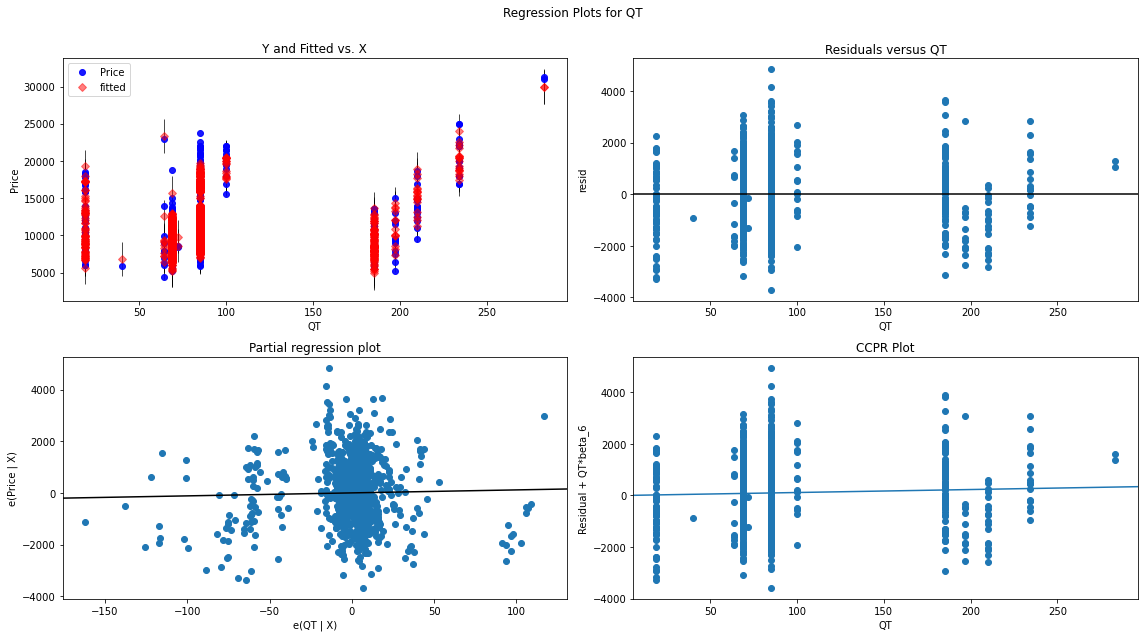

In [164]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model_2, 'QT', fig=fig)
plt.show()

#### ^Observation No Linear Relation found between QT and the Dependent feature in Partial Regression Plot

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )
+ This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Weight,219.72
3,CC,210.97
2,HP,83.91
4,Doors,21.07
5,QT,15.67
0,Age,15.08
1,KM,8.47


#### Note: We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

#### Model3
+ Dropping the variable and updating the model
+ As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, QT as it has a very high P Value of 0.394. Let's go ahead and drop this variables

In [64]:
# Dropping highly correlated variables and insignificant variables

x1 = x.drop('QT', axis=1)
y1 = y.drop('QT', axis=1)
x1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Weight'], dtype='object')

In [65]:
model_3 = smf.ols('Price~Age+KM+HP+CC+Doors+Weight', data = x1).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     2018.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:09:48   Log-Likelihood:                -11944.
No. Observations:                1415   AIC:                         2.390e+04
Df Residuals:                    1408   BIC:                         2.394e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.447e+04   1052.073    -13.758      0.000   -1.65e+04   -1.24e+04
Age         -110.2777      2.319    -47.555      0.000    -114.827    -105.729
KM            -0.0171      0.001    -15.357      0.000      -0.019      -0.015
HP            27.1780      2.294     11.846      0.000      22.677      31.679
CC            -3.2391      0.263    -12.335      0.000      -3.754      -2.724
Doors       -151.5611     34.045     -4.452      0.000    -218.345     -84.778
Weight        33.1084      1.161     28.527      0.000      30.832      35.385
==============================================================================
Omnibus:                       20.557   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.227
Skew:                           0.206   Prob(JB):                     3.33e-06
Kurtosis:                       3.508   Cond. No.                     2.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )
+ This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = y1.columns
vif['VIF'] = [variance_inflation_factor(y1.values, i) for i in range(y1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Weight,218.33
3,CC,142.43
2,HP,58.30
4,Doors,21.06
0,Age,13.78
1,KM,8.41


In [75]:
x1.corr()

,Price,Age,KM,HP,CC,Doors,Weight
Price,1.000000,-0.889164,-0.574291,0.270669,0.156336,0.189252,0.612225
Age,-0.889164,1.000000,0.509613,-0.138135,-0.122557,-0.144823,-0.494047
KM,-0.574291,0.509613,1.000000,-0.330211,0.310034,-0.038075,-0.009566
HP,0.270669,-0.138135,-0.330211,1.000000,0.044670,0.101758,0.068572
CC,0.156336,-0.122557,0.310034,0.044670,1.000000,0.122713,0.700997
Doors,0.189252,-0.144823,-0.038075,0.101758,0.122713,1.000000,0.332193
Weight,0.612225,-0.494047,-0.009566,0.068572,0.700997,0.332193,1.000000


#### ^Observation No Linear Relation found between QT and the Dependent feature in Partial Regression Plot

+ As you can see from the summary, some variables are not insignificant anymore.
+ Yet our model states <b>"The condition number is large, 3.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems."

####  Model4
+ Dropping the variable and updating the model
+ Let's Try to Drop data with the highest VIF Score and with the collinearity within Features that is here Weight Feature to CC and Age, with VIF of 218.33 and Correaltion of -0.49 with Age and 0.70 with CC

In [66]:
# Dropping highly correlated variables and insignificant variables

x2 = x1.drop('Weight', axis=1)
y2 = y1.drop('Weight', axis=1)
x2.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors'], dtype='object')

In [67]:
model_4 = smf.ols('Price~Age+KM+HP+CC+Doors', data = x2).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1433.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:09:51   Log-Likelihood:                -12267.
No. Observations:                1415   AIC:                         2.455e+04
Df Residuals:                    1409   BIC:                         2.458e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.358e+04    469.144     28.951      0.000    1.27e+04    1.45e+04
Age         -142.6089      2.540    -56.135      0.000    -147.592    -137.625
KM            -0.0178      0.001    -12.716      0.000      -0.020      -0.015
HP            22.9130      2.875      7.970      0.000      17.273      28.553
CC             2.0973      0.231      9.062      0.000       1.643       2.551
Doors        178.4678     40.207      4.439      0.000      99.596     257.339
==============================================================================
Omnibus:                      277.232   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1319.830
Skew:                           0.840   Prob(JB):                    2.53e-287
Kurtosis:                       7.423   Cond. No.                     9.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )
This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = y2.columns
vif['VIF'] = [variance_inflation_factor(y2.values, i) for i in range(y2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,CC,55.59
2,HP,46.58
4,Doors,18.36
0,Age,13.17
1,KM,8.30


In [79]:
x2.corr()

,Price,Age,KM,HP,CC,Doors
Price,1.000000,-0.889164,-0.574291,0.270669,0.156336,0.189252
Age,-0.889164,1.000000,0.509613,-0.138135,-0.122557,-0.144823
KM,-0.574291,0.509613,1.000000,-0.330211,0.310034,-0.038075
HP,0.270669,-0.138135,-0.330211,1.000000,0.044670,0.101758
CC,0.156336,-0.122557,0.310034,0.044670,1.000000,0.122713
Doors,0.189252,-0.144823,-0.038075,0.101758,0.122713,1.000000


+ As you can see from the summary, some variables are not insignificant anymore.
+ Yet our model states <b>"The condition number is large, 3.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems."

#### Model5
+ Dropping the variable and updating the model
+ Let's Try to Drop data with the highest VIF Score and with the high collinearity within features that is here KM Feature to Age, HP and CC as well, with VIF of 8.30 and Correlation of 0.50 with Age, -0.33 with HP and 0.31 with QT

In [68]:
# Dropping highly correlated variables and insignificant variables

x3 = x2.drop('KM', axis=1)
y3 = y2.drop('KM', axis=1)
x3.columns

Index(['Price', 'Age', 'HP', 'CC', 'Doors'], dtype='object')

In [69]:
model_5 = smf.ols('Price~Age+CC+HP+Doors', data = x3).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1571.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:09:55   Log-Likelihood:                -12344.
No. Observations:                1415   AIC:                         2.470e+04
Df Residuals:                    1410   BIC:                         2.472e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.428e+04    491.730     29.046      0.000    1.33e+04    1.52e+04
Age         -161.1782      2.194    -73.458      0.000    -165.482    -156.874
CC             0.7332      0.216      3.387      0.001       0.309       1.158
HP            35.8326      2.839     12.623      0.000      30.264      41.401
Doors        165.6823     42.423      3.905      0.000      82.463     248.901
==============================================================================
Omnibus:                      271.448   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1384.033
Skew:                           0.799   Prob(JB):                    2.89e-301
Kurtosis:                       7.574   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )
This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = y3.columns
vif['VIF'] = [variance_inflation_factor(y3.values, i) for i in range(y3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,CC,41.17
1,HP,36.05
3,Doors,18.36
0,Age,8.69


In [83]:
x3.corr()

,Price,Age,HP,CC,Doors
Price,1.000000,-0.889164,0.270669,0.156336,0.189252
Age,-0.889164,1.000000,-0.138135,-0.122557,-0.144823
HP,0.270669,-0.138135,1.000000,0.044670,0.101758
CC,0.156336,-0.122557,0.044670,1.000000,0.122713
Doors,0.189252,-0.144823,0.101758,0.122713,1.000000


#### Model6
+ Dropping the variable and updating the model
+ Let's Try to Drop data with the highest VIF Score and with the high collinearity within feature that is here Doors Feature to HP and Age

In [70]:
# Dropping highly correlated variables and insignificant variables

x4 = x3.drop('Doors', axis=1)
y4 = y3.drop('Doors', axis=1)
x4.columns

Index(['Price', 'Age', 'HP', 'CC'], dtype='object')

In [71]:
model_6 = smf.ols('Price~Age+CC+HP', data = x4).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2069.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:10:00   Log-Likelihood:                -12352.
No. Observations:                1415   AIC:                         2.471e+04
Df Residuals:                    1411   BIC:                         2.473e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.478e+04    477.442     30.954      0.000    1.38e+04    1.57e+04
Age         -162.2101      2.189    -74.097      0.000    -166.504    -157.916
CC             0.8219      0.216      3.799      0.000       0.398       1.246
HP            36.7295      2.844     12.917      0.000      31.152      42.308
==============================================================================
Omnibus:                      272.745   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1380.038
Skew:                           0.806   Prob(JB):                    2.13e-300
Kurtosis:                       7.562   Cond. No.                     1.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )
This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = y4.columns
vif['VIF'] = [variance_inflation_factor(y4.values, i) for i in range(y4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,CC,35.08
1,HP,33.02
0,Age,8.69


In [87]:
x4.corr()

,Price,Age,HP,CC
Price,1.000000,-0.889164,0.270669,0.156336
Age,-0.889164,1.000000,-0.138135,-0.122557
HP,0.270669,-0.138135,1.000000,0.044670
CC,0.156336,-0.122557,0.044670,1.000000


#### Model7
+ Dropping the variable and updating the model
+ Let's Try to Drop data with the highest VIF Score and with the high collinearity within feature that is here CC Feature to HP and Age as well, with VIF of 35.08 and Correlation of -0.12 with Age

In [72]:
# Dropping highly correlated variables and insignificant variables

x5 = x4.drop('CC', axis=1)
y5 = y4.drop('CC', axis=1)
x5.columns

Index(['Price', 'Age', 'HP'], dtype='object')

In [73]:
model_7 = smf.ols('Price~Age+HP', data = x5).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3067.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:10:05   Log-Likelihood:                -12359.
No. Observations:                1415   AIC:                         2.472e+04
Df Residuals:                    1412   BIC:                         2.474e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.609e+04    331.990     48.460      0.000    1.54e+04    1.67e+04
Age         -163.1885      2.184    -74.711      0.000    -167.473    -158.904
HP            37.0344      2.856     12.968      0.000      31.432      42.637
==============================================================================
Omnibus:                      314.250   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1717.549
Skew:                           0.920   Prob(JB):                         0.00
Kurtosis:                       8.074   Cond. No.                         969.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )
This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = y5.columns
vif['VIF'] = [variance_inflation_factor(y5.values, i) for i in range(y5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,7.92
1,HP,7.92


#### ^Observation the VIF score is still above 5 we need to remove one of the feature as it suggest multicollinearity

In [164]:
# Dropping highly correlated variables and insignificant variables

x6 = x5.drop('HP', axis=1)
y6 = y5.drop('HP', axis=1)
x6.columns

Index(['Price', 'Age'], dtype='object')

In [165]:
model_8 = smf.ols('Price~Age', data = x6).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     5335.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:22:18   Log-Likelihood:                -12438.
No. Observations:                1415   AIC:                         2.488e+04
Df Residuals:                    1413   BIC:                         2.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.006e+04    135.236    148.342      0.000    1.98e+04    2.03e+04
Age         -167.1012      2.288    -73.043      0.000    -171.589    -162.613
==============================================================================
Omnibus:                      311.582   Durbin-Watson:                   1.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1754.127
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       8.147   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's Apply Some Data transformation to improve our model

#### Log transformation

In [197]:
log_transform_both = smf.ols('np.log(Price)~np.log(Age)', data = x6).fit()
log_transform_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     3493.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:52:35   Log-Likelihood:                 638.63
No. Observations:                1415   AIC:                            -1273.
Df Residuals:                    1413   BIC:                            -1263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1200      0.032    345.214      0.000      11.057      11.183
np.log(Age)    -0.4795      0.008    -59.099      0.000      -0.495      -0.464
==============================================================================
Omnibus:                      501.575   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4837.265
Skew:                          -1.366   Prob(JB):                         0.00
Kurtosis:                      11.636   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
log_transform_independent = smf.ols('Price~np.log(Age)', data = x6).fit()
log_transform_independent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     5023.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:51:52   Log-Likelihood:                -12472.
No. Observations:                1415   AIC:                         2.495e+04
Df Residuals:                    1413   BIC:                         2.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     3.46e+04    340.342    101.672      0.000    3.39e+04    3.53e+04
np.log(Age) -6075.4169     85.724    -70.872      0.000   -6243.578   -5907.256
==============================================================================
Omnibus:                      545.002   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18475.634
Skew:                          -1.129   Prob(JB):                         0.00
Kurtosis:                      20.558   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
log_transform_dependent = smf.ols('np.log(Price)~Age', data = x6).fit()
log_transform_dependent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     5410.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:51:29   Log-Likelihood:                 872.08
No. Observations:                1415   AIC:                            -1740.
Df Residuals:                    1413   BIC:                            -1730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0082      0.011    900.580      0.000       9.986      10.030
Age           -0.0138      0.000    -73.556      0.000      -0.014      -0.013
==============================================================================
Omnibus:                       72.073   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.858
Skew:                          -0.416   Prob(JB):                     1.15e-25
Kurtosis:                       4.120   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Cube-Root Transformation

In [201]:
cbrt_transform_both = smf.ols('np.cbrt(Price)~np.cbrt(Age)', data = x6).fit()
cbrt_transform_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.cbrt(Price)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     5631.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:54:40   Log-Likelihood:                -1965.0
No. Observations:                1415   AIC:                             3934.
Df Residuals:                    1413   BIC:                             3945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.6249      0.186    191.513      0.000      35.260      35.990
np.cbrt(Age)    -3.6743      0.049    -75.042      0.000      -3.770      -3.578
==============================================================================
Omnibus:                      128.539   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.014
Skew:                          -0.459   Prob(JB):                     1.84e-83
Kurtosis:                       5.370   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
cbrt_transform_dependent = smf.ols('np.cbrt(Price)~Age', data = x6).fit()
cbrt_transform_dependent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.cbrt(Price)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     5697.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:55:36   Log-Likelihood:                -1958.5
No. Observations:                1415   AIC:                             3921.
Df Residuals:                    1413   BIC:                             3931.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.6900      0.082    337.078      0.000      27.529      27.851
Age           -0.1049      0.001    -75.477      0.000      -0.108      -0.102
==============================================================================
Omnibus:                       36.202   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.712
Skew:                          -0.074   Prob(JB):                     8.09e-18
Kurtosis:                       4.146   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
cbrt_transform_independent = smf.ols('Price~np.cbrt(Age)', data = x6).fit()
cbrt_transform_independent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     6469.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:55:57   Log-Likelihood:                -12328.
No. Observations:                1415   AIC:                         2.466e+04
Df Residuals:                    1413   BIC:                         2.467e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.314e+04    282.046    117.513      0.000    3.26e+04    3.37e+04
np.cbrt(Age) -5971.1781     74.241    -80.430      0.000   -6116.812   -5825.544
==============================================================================
Omnibus:                      161.339   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1167.050
Skew:                           0.242   Prob(JB):                    3.79e-254
Kurtosis:                       7.423   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Square-Root Transformation

In [198]:
sqrt_transform_dependent = smf.ols('np.sqrt(Price)~Age', data = x6).fit()
sqrt_transform_dependent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(Price)   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     5725.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:53:24   Log-Likelihood:                -4744.0
No. Observations:                1415   AIC:                             9492.
Df Residuals:                    1413   BIC:                             9502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    144.4339      0.588    245.556      0.000     143.280     145.588
Age           -0.7529      0.010    -75.663      0.000      -0.772      -0.733
==============================================================================
Omnibus:                       54.262   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.957
Skew:                           0.127   Prob(JB):                     1.49e-31
Kurtosis:                       4.531   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
sqrt_transform_both= smf.ols('np.sqrt(Price)~np.sqrt(Age)', data = x6).fit()
sqrt_transform_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(Price)   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     6261.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:53:47   Log-Likelihood:                -4692.7
No. Observations:                1415   AIC:                             9389.
Df Residuals:                    1413   BIC:                             9400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      173.9841      0.925    188.122      0.000     172.170     175.798
np.sqrt(Age)    -9.7663      0.123    -79.127      0.000     -10.008      -9.524
==============================================================================
Omnibus:                       48.696   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.568
Skew:                          -0.113   Prob(JB):                     6.59e-27
Kurtosis:                       4.412   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
sqrt_transform_independent = smf.ols('Price~np.sqrt(Age)', data = x6).fit()
sqrt_transform_independent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     6519.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:56:27   Log-Likelihood:                -12324.
No. Observations:                1415   AIC:                         2.465e+04
Df Residuals:                    1413   BIC:                         2.466e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.679e+04    203.362    131.754      0.000    2.64e+04    2.72e+04
np.sqrt(Age) -2191.3046     27.139    -80.742      0.000   -2244.543   -2138.067
==============================================================================
Omnibus:                      183.608   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.753
Skew:                           0.537   Prob(JB):                    7.27e-178
Kurtosis:                       6.561   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ^Observation: As our Multicollinearity problem has been solved

#### Let's compare the residuals of all the models to come up with an conclusion

#### Model Validation
#### Comparing different models with respect to their Root Mean Squared Errors
#### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [74]:
from sklearn.metrics import mean_squared_error

In [210]:
square_root_both_pred_y =np.square(sqrt_transform_both.predict(x6[['Age']]))
square_root_dependent_pred_y =np.square(sqrt_transform_dependent.predict(x6[['Age']]))
cube_root_both_pred_y =pow(cbrt_transform_both.predict(x6[['Age']]),3)
cube_root_dependent_pred_y =pow(cbrt_transform_dependent.predict(x6[['Age']]),3)
log_model_both_pred_y =np.exp(log_transform_both.predict(x6[['Age']]))
log_model_dependent_pred_y =np.exp(log_transform_dependent.predict(x6[['Age']]))

In [211]:
square_root_both_rmse =np.sqrt(mean_squared_error(x6['Price'], square_root_both_pred_y))
square_root_dependent_rmse =np.sqrt(mean_squared_error(x6['Price'], square_root_dependent_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(x6['Price'], cube_root_both_pred_y))
cube_root_dependent_rmse =np.sqrt(mean_squared_error(x6['Price'], cube_root_dependent_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(x6['Price'], log_model_both_pred_y))
log_dependent_rmse =np.sqrt(mean_squared_error(x6['Price'], log_model_dependent_pred_y))

In [212]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Log Transformation on dependent Model=', log_dependent_rmse,
      '\n''After Log Transformation on independent Model=', np.sqrt(log_transform_independent.mse_resid),
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
      '\n''After Cube-root Transformation on dependent Model=', cube_root_dependent_rmse,
      '\n''After Cube-root Transformation on independent Model=', np.sqrt(cbrt_transform_independent.mse_resid),
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Sqaure Root Transformation on dependent Model=', np.sqrt(sqrt_transform_independent.mse_resid),
      '\n''After Sqaure Root Transformation on independent Model=', square_root_rmse,
     '\n''Final Model without Multicollinearity Model=', np.sqrt(model_8.mse_resid))

Raw Model= 1344.6540617457265 
After Removing Influencers= 1123.3552990025453 
After Log Transformation on both Model= 2697.098115468083 
After Log Transformation on dependent Model= 1456.676911610272 
After Log Transformation on independent Model= 1629.1547329225536 
After Cube-root Transformation on both Model= 1568.6957329707218 
After Cube-root Transformation on dependent Model= 1488.5837541483002 
After Cube-root Transformation on independent Model= 1472.1262230450832 
After Sqaure Root Transformation on both Model= 1463.0799752628668 
After Sqaure Root Transformation on dependent Model= 1467.4460851378042 
After Sqaure Root Transformation on independent Model= 11059.2393815153 
Final Model without Multicollinearity Model= 1590.9911847109224


#### Let's compare the Root Mean Squared Error and check for the minimum value 

In [213]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation on both Model': log_both_rmse,
      'After Log Transformation on dependent Model': log_dependent_rmse,
      'After Log Transformation on independent Model': np.sqrt(log_transform_independent.mse_resid),
      'After Cube-root Transformation on both Model': cube_root_both_rmse,
      'After Cube-root Transformation on dependent Model': cube_root_dependent_rmse,
      'After Cube-root Transformation on independent Model': np.sqrt(cbrt_transform_independent.mse_resid),
     'After Sqaure Root Transformation on both Model': square_root_both_rmse,
      'After Sqaure Root Transformation on dependent Model': np.sqrt(sqrt_transform_independent.mse_resid),
      'After Sqaure Root Transformation on independent Model': square_root_rmse,
     'Final Model without Multicollinearity Model': np.sqrt(model_8.mse_resid)}
min(rmse_compare, key=rmse_compare.get)

'After Removing Influencers'

#### ^Observation: The Model that was build After Removing the Influencers performed very well.
+ Scoring minimumn Root mean squared error and maximum R-squared and adjusted R-squared
+ <b> Note: We are going to rebuild the model by using that model

In [152]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1516.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:17:29   Log-Likelihood:                -11942.
No. Observations:                1415   AIC:                         2.390e+04
Df Residuals:                    1406   BIC:                         2.395e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.549e+04   1406.428    -11.017      0.000   -1.83e+04   -1.27e+04
Age         -110.2879      2.317    -47.591      0.000    -114.834    -105.742
KM            -0.0173      0.001    -15.477      0.000      -0.020      -0.015
HP            27.2559      2.744      9.932      0.000      21.873      32.639
CC            -3.3044      0.286    -11.564      0.000      -3.865      -2.744
Doors       -136.0069     34.918     -3.895      0.000    -204.504     -67.510
Gears        314.0351    175.589      1.788      0.074     -30.410     658.481
QT             1.0384      1.356      0.766      0.444      -1.622       3.698
Weight        32.5472      1.278     25.470      0.000      30.041      35.054
==============================================================================
Omnibus:                       21.013   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.413
Skew:                           0.215   Prob(JB):                     3.03e-06
Kurtosis:                       3.497   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Residual Analysis
+ Test for Normality of Residuals (Q-Q Plot)

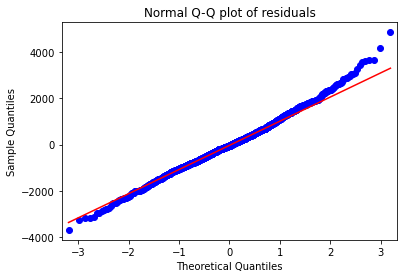

In [154]:
#Residuals values  = y - yhat
sm.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### ^Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

### Residual Plot for Homoscedasticity

In [155]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

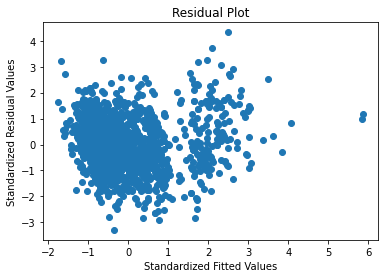

In [156]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### ^Observation: Constant Variance (Homoscedasticity) in Error

#### Residual VS Regressors

+ Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

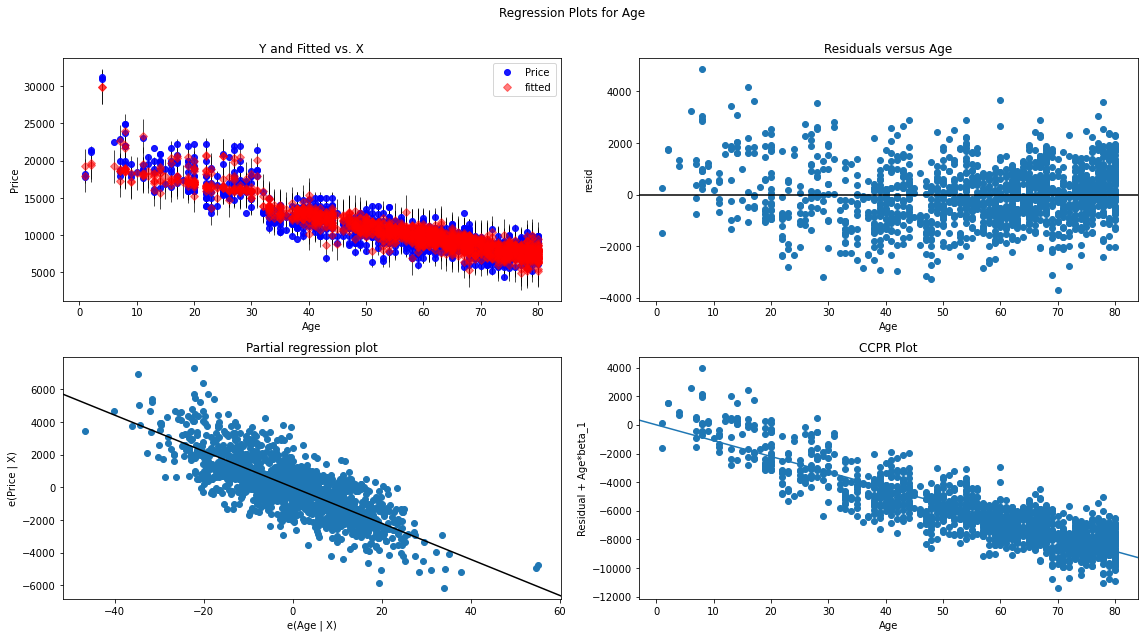

In [157]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(final_model, 'Age', fig=fig)
plt.show()

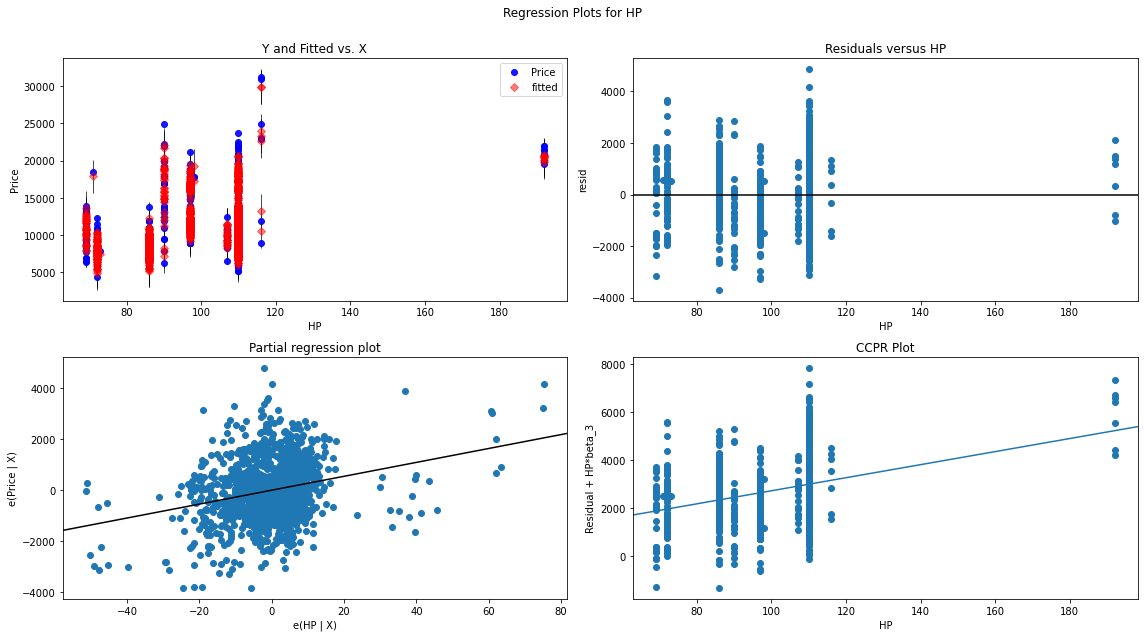

In [159]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(final_model, 'HP', fig=fig)
plt.show()

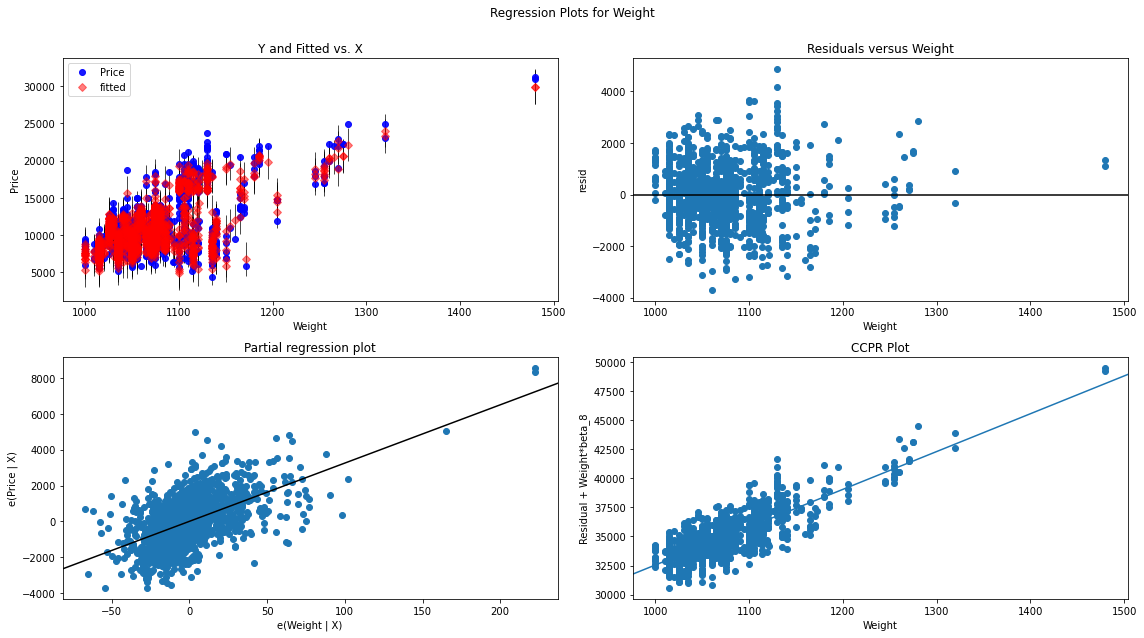

In [160]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(final_model, 'Weight', fig=fig)
plt.show()

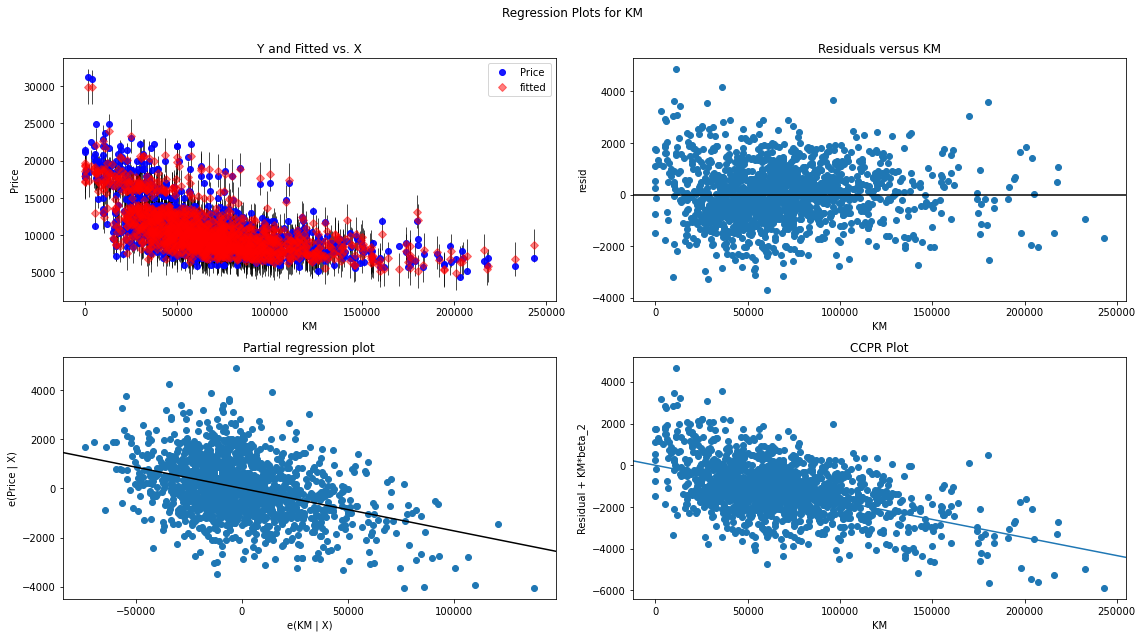

In [161]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(final_model, 'KM', fig=fig)
plt.show()

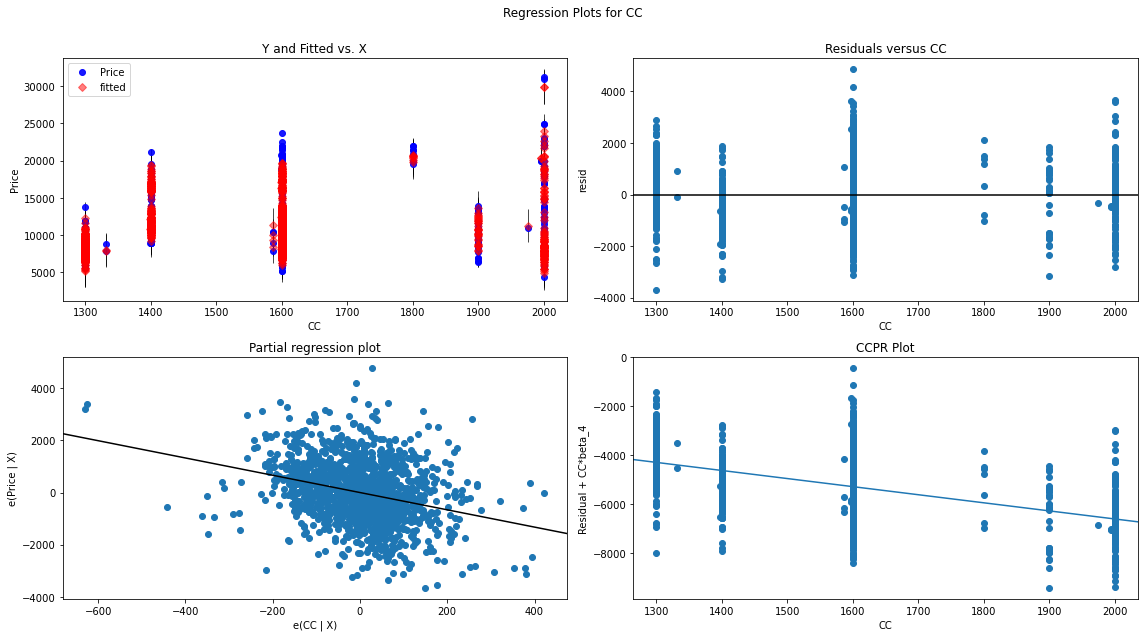

In [162]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(final_model, 'CC', fig=fig)
plt.show()

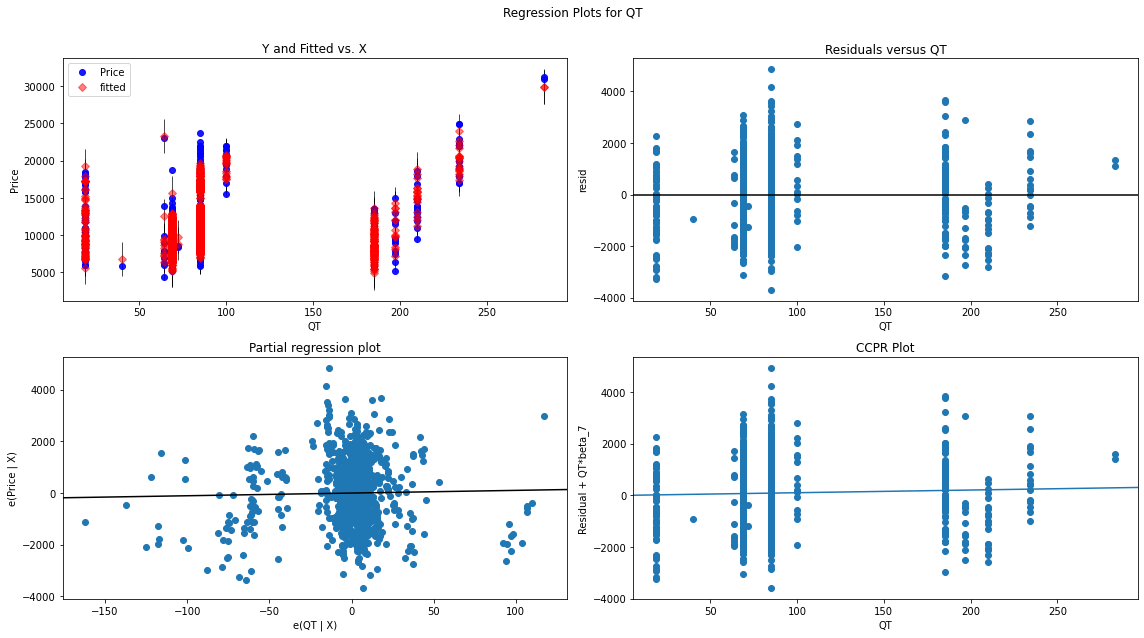

In [166]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(final_model, 'QT', fig=fig)
plt.show()

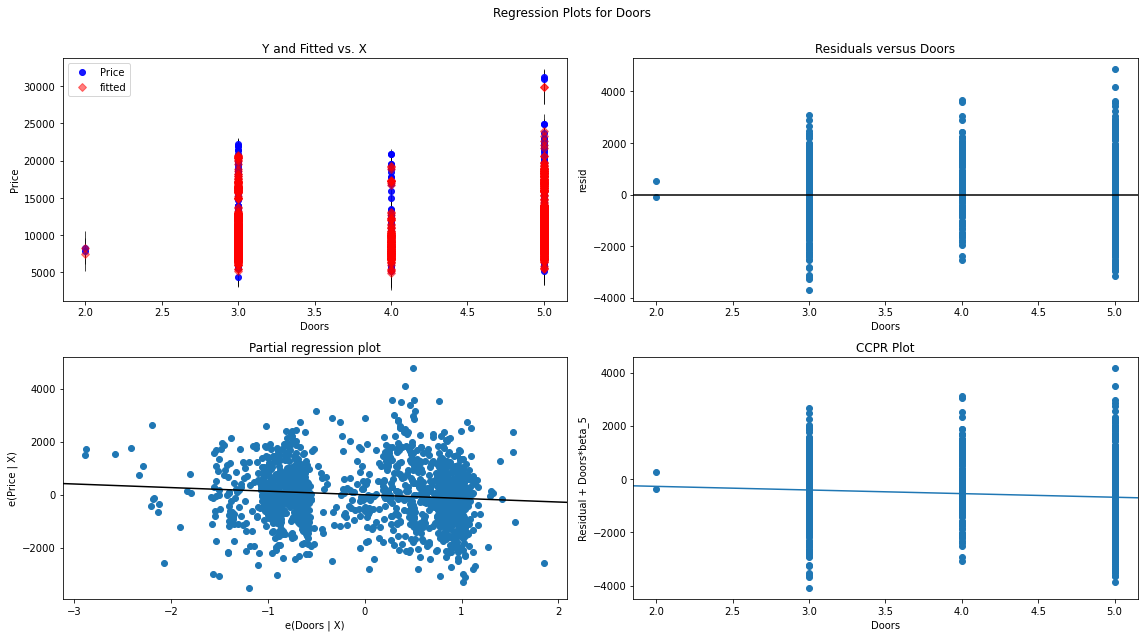

In [167]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(final_model, 'Doors', fig=fig)
plt.show()

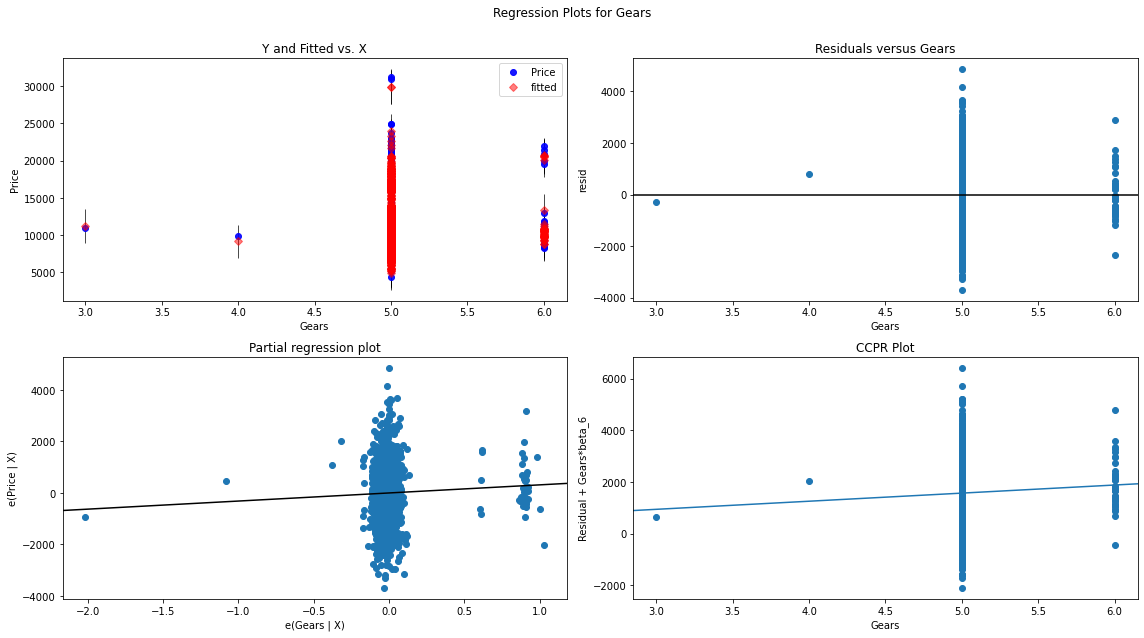

In [168]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(final_model, 'Gears', fig=fig)
plt.show()

#### ^Observation: 
+ Some of the feature doesn't suggest linear relationship with the Dependent feature like Gears, QT, CC, Doors, Weight and HP
+ Only KM and Age is having a linear relation with the Price Feature

### Predicting values from Model using same dataset

In [169]:
predicted = pd.DataFrame()
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['QT'] = dataframe.QT
predicted['Doors'] = dataframe.Doors
predicted['Gears'] = dataframe.Gears
predicted['Price'] = dataframe.Price
predicted['Predicted_Price'] = pd.DataFrame(final_model.predict(predicted[['Age','KM','Weight','HP','CC','QT','Doors','Gears']]))
predicted

,Age,KM,Weight,HP,CC,QT,Doors,Gears,Price,Predicted_Price
0,23,46986,1165,90.0,2000,210,3,5,13500,16296.974368
1,23,72937,1165,90.0,2000,210,3,5,13750,15847.652682
2,24,41711,1165,90.0,2000,210,3,5,13950,16278.019102
3,26,48000,1165,90.0,2000,210,3,5,14950,15948.554183
4,30,38500,1170,90.0,2000,210,3,5,13750,15834.624168
...,...,...,...,...,...,...,...,...,...,...
1410,80,23000,1015,86.0,1300,69,3,5,8450,7601.405578
1411,69,20544,1025,86.0,1300,69,3,5,7500,9182.568023
1412,72,19000,1015,86.0,1300,69,3,5,10845,8552.965319
1413,71,17016,1015,86.0,1300,69,3,5,8500,8697.604610


## Preparing a table containing R^2 value for each prepared model

In [174]:
models={'Different_Models':['Raw_data','After Removing Influencers','After Log Transformation Model','After Cube-root Transformation Model','After Sqaure Root Transformation Model','Final Model without Multicollinearity Model'],
        'R_squared':[raw_data_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cbrt_transformed_model.rsquared,sqrt_transformed_model.rsquared,model_8.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_8.rsquared_adj],
       'RMSE':[np.sqrt(raw_data_model.mse_resid),np.sqrt(final_model.mse_resid),log_rmse,cube_root_rmse,square_root_rmse,np.sqrt(model_8.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.861742,0.861161,1344.654062
1,After Removing Influencers,0.896129,0.895538,1123.355299
2,After Log Transformation Model,0.767614,0.766292,11167.200349
3,After Cube-root Transformation Model,0.859940,0.859143,11154.715381
4,After Sqaure Root Transformation Model,0.883799,0.883138,11059.239382
5,Final Model without Multicollinearity Model,0.790612,0.790464,1590.991185


### Visualizing Models Performance

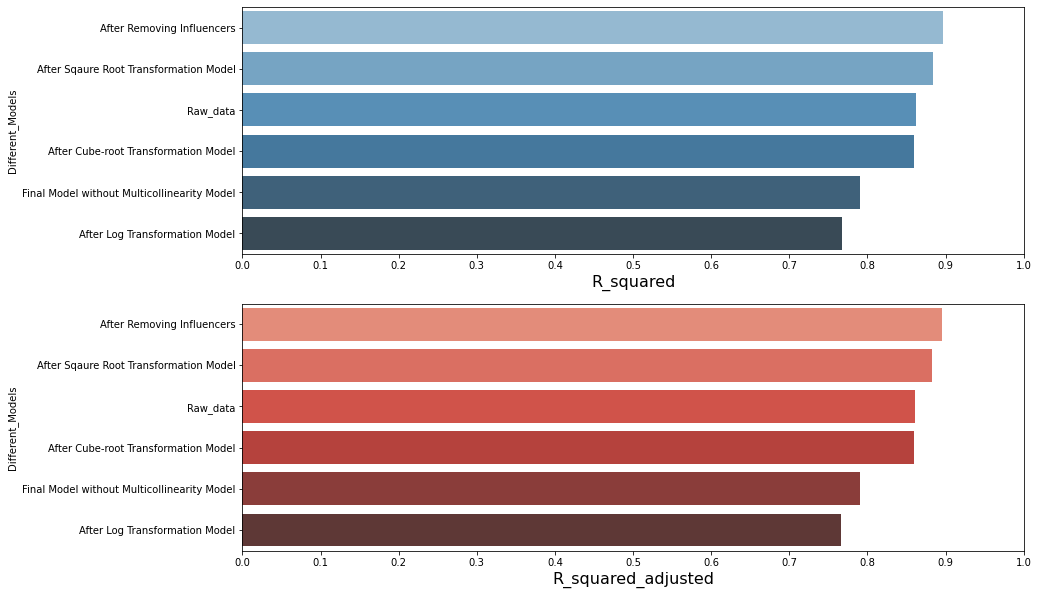

In [175]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

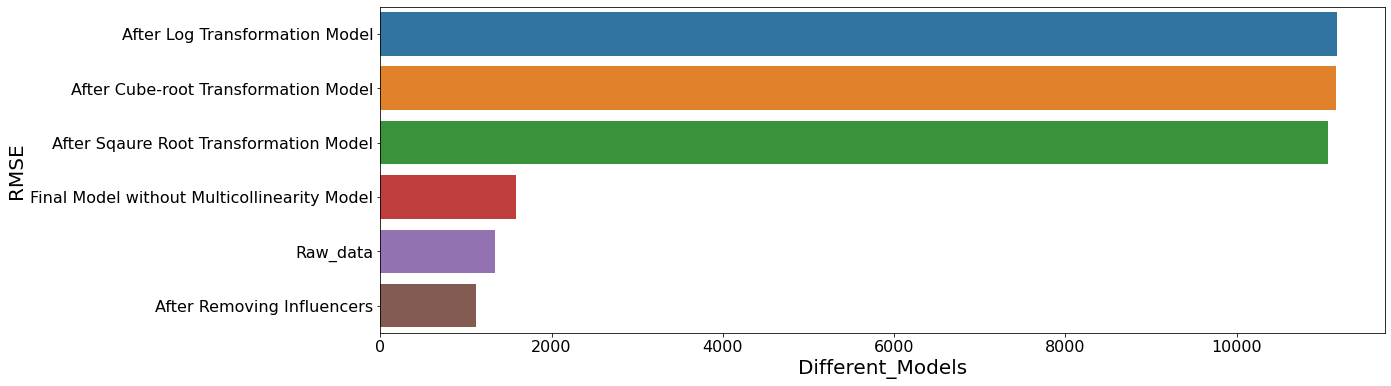

In [183]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=20)
axe.set_ylabel('RMSE', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

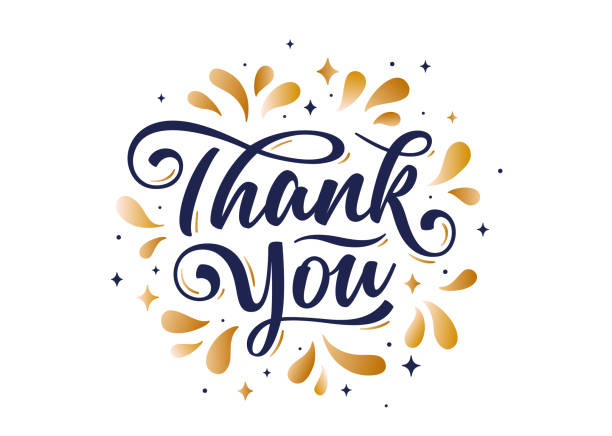

In [75]:
from PIL import ImageGrab
ImageGrab.grabclipboard()